In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import peak_widths, find_peaks
import os
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS" # override default font
%matplotlib inline

In [2]:
path = './ladder rung results/'

file_list = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        file_list.append(os.path.join(path, file))
        
print(np.array(sorted(file_list)))

['./ladder rung results/Irregular_347_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_347_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_351_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_351_3dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_351_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_357_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_357_3dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_357_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_359_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_359_3dpi_croppedDLC_resnet50_Ladder RungMay12shuff

In [3]:
def read_file(file):
    
    pd_dataframe = pd.read_csv(file, header=[1,2])
    filename = file.split('/')[-1].split('_')
    filename = filename[0] + ' ' + filename[1] + ' ' + filename[2]
    return pd_dataframe, filename


def fix_column_names(pd_dataframe):
    
    header_1 = pd_dataframe.columns.get_level_values(0)
    header_2 = pd_dataframe.columns.get_level_values(1)
    col_names = []

    for i in range(len(header_1)):
        col_names.append(' '.join([header_1[i], header_2[i]]))
        
    pd_dataframe.columns = col_names
    
    return pd_dataframe


def filter_predictions(pd_dataframe, bodyparts, threshold):
    
    if type(bodyparts) is list and len(bodyparts) > 1:
        for bodypart in bodyparts:
            pd_dataframe = pd_dataframe[pd_dataframe[bodypart + ' likelihood'] >= threshold]
    
    elif type(bodyparts) is list and len(a) == 1:
        pd_dataframe = pd_dataframe[pd_dataframe[bodyparts[0] + ' likelihood'] >= threshold]
    
    elif type(bodyparts) is str:
        pd_dataframe = pd_dataframe[pd_dataframe[bodyparts + ' likelihood'] >= threshold]
        
    # raise error if any bodypart name not identical as in csv
        
    return pd_dataframe


def plot_data(pd_dataframe, bodyparts, start, end, file_identifier, axis = 'y', threshold = 0):
    
#     if threshold > 0:
#         pd_dataframe = filter_predictions(pd_dataframe, bodyparts, threshold)
        
    plt.figure(figsize=(20,5))
    labels = []
    
    if type(axis) is list:
        
        if type(bodyparts) is list and len(bodyparts) > 1:
            for bodypart in bodyparts:
                plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, axis[0])][start:end], s=1)
                plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, axis[1])][start:end], s=1)
            for which_axis in axis:
                for bodypart in bodyparts:
                    labels.append('%s %s' %(bodypart, which_axis))
                
        elif type(bodyparts) is list and len(bodyparts) == 1:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts[0], axis[0])][start:end], s=1)
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts[0], axis[1])][start:end], s=1)
            for which_axis in axis:
                labels.append('%s %s' %(bodyparts[0], which_axis))
            
        elif type(bodyparts) is str:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts, axis[0])][start:end], s=1)
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts, axis[1])][start:end], s=1)
            for which_axis in axis:
                labels.append('%s %s' %(bodyparts, which_axis))
    
    else:
        
        if type(bodyparts) is list and len(bodyparts) > 1:
            for bodypart in bodyparts:
                plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, axis)][start:end], s=1)
                labels.append('%s %s' %(bodypart, axis))
        elif type(bodyparts) is list and len(bodyparts) == 1:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts[0], axis)][start:end], s=1)
            labels.append('%s %s' %(bodyparts[0], axis))
        elif type(bodyparts) is str:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts, axis)][start:end], s=1)
            labels.append('%s %s' %(bodyparts, axis))
            
            
    if threshold < 1:
        low_likelihood = np.array(pd_dataframe[pd_dataframe[bodyparts + ' likelihood'] < threshold]['bodyparts coords'])
        low_likelihood = low_likelihood[low_likelihood >= start]
        low_likelihood = low_likelihood[low_likelihood <= end]

        for i in low_likelihood:
    #         print(i)
            plt.axvspan(i, i+1, facecolor='0.2', alpha=0.5)
        
    plt.legend(labels)
    plt.xlabel('n frame')
    plt.ylabel('distance from 0 (pixel)')
    plt.title('%s coordinates by frame' % file_identifier)

In [4]:
def find_slips(pd_dataframe, bodypart, **kwargs): 
        
    peaks, properties = find_peaks(-pd_dataframe['%s y'%bodypart], height=-5000, prominence=(10,100000))
    # peaks, properties = find_peaks(pd_dataframe, prominence=0, distance=18, height=-10, width = 0)
    # width_half = peak_widths(data, peaks, rel_height=0.5)
    
#         peaks, properties = find_peaks(-data, prominence=(10,100000), height=-5000, width = 0)
#         width_half = peak_widths(-data, peaks, rel_height=0.5)
    
    index = pd_dataframe['bodyparts coords'].iloc[:]
    
    is_peak = np.zeros(len(index))
    n_peaks = 0
    current_data = pd_dataframe.iloc[0]
    norm = np.max(pd_dataframe['%s y'%bodypart])
    std = np.std(pd_dataframe['%s y'%bodypart])
    
    for i in range(len(is_peak)):
        
        if i in peaks:
            # is_peak[i] = df['toe y'][i]
            is_peak[i] = norm-std*4
            n_peaks += 1
        
        else:
            is_peak[i] = norm-std*2
            
        current_data = pd_dataframe.iloc[i]
        
        h_peaks = np.mean(properties["prominences"])
        
    return n_peaks, h_peaks, peaks, properties

In [5]:
def plot_slips(pd_dataframe, bodypart, slip_t):
    
    index = pd_dataframe['bodyparts coords'].iloc[:]
    data = pd_dataframe['%s y' %bodypart]
    
#     plt.figure(figsize=(20,8))
#     plt.plot(index, data)
#     plt.scatter(index.iloc[slip_t], data.iloc[slip_t], s=15,color='r')
    plt.legend(['coordinate', 'peak'], loc=3)
    plt.xlabel('n frame')
    plt.ylabel('distance from 0 (pixel)')
    plt.vlines(x=index.iloc[slip_t], ymin=data.iloc[slip_t] + properties["prominences"], ymax=data.iloc[slip_t], color="r")
     
    h_peaks = np.mean(properties["prominences"])    
    print(h_peaks, 'pixels')   

In [ ]:
def jump_filter(pd_dataframe, bodypart):
    
    # loop through

In [49]:
bodyparts = ['HL', 'HR']

In [321]:
file = file_list[6]

df, filename = read_file(file)
df = fix_column_names(df)
df = filter_predictions(df, 'HR', 0)

# df
file

'./ladder rung results/Irregular_370_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


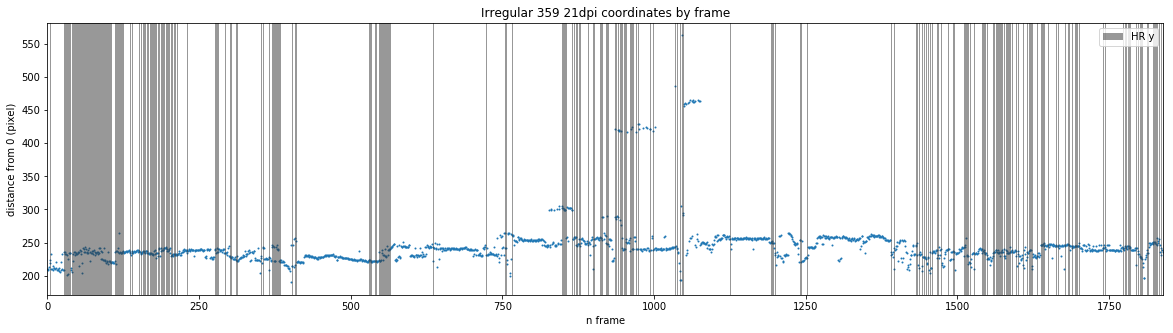

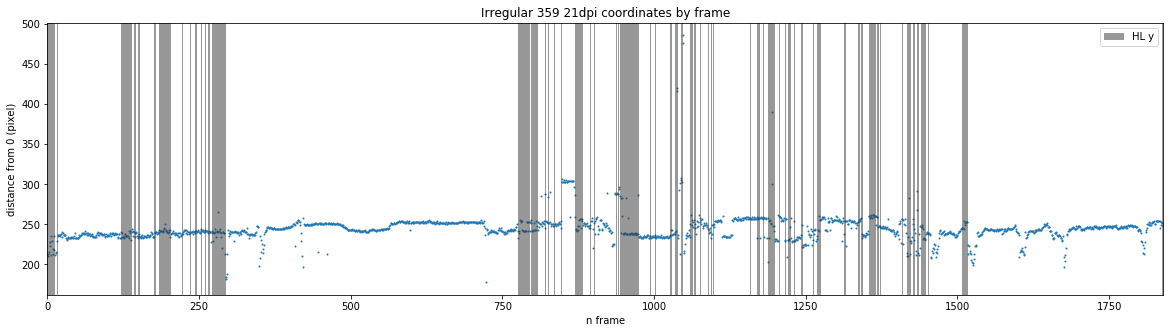

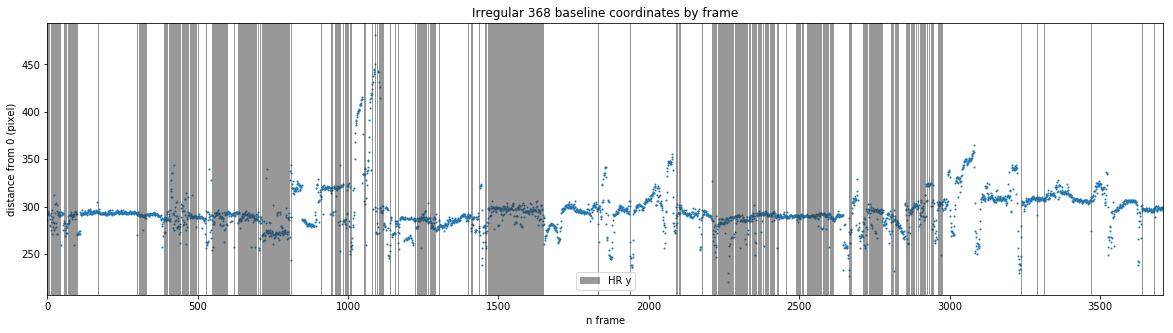

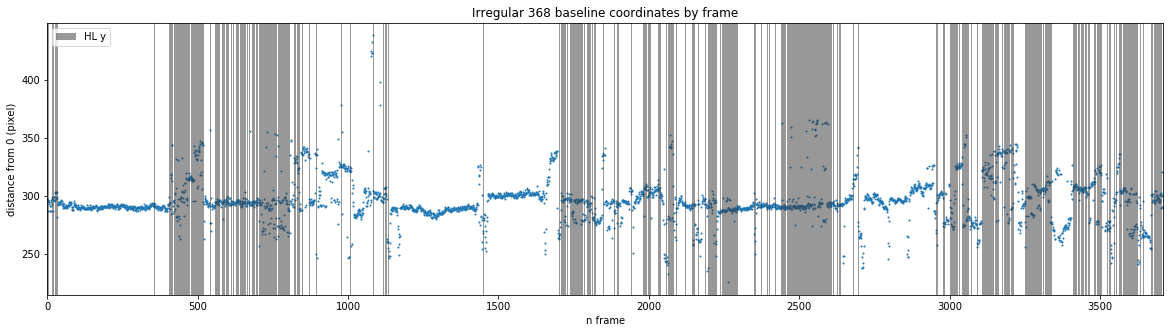

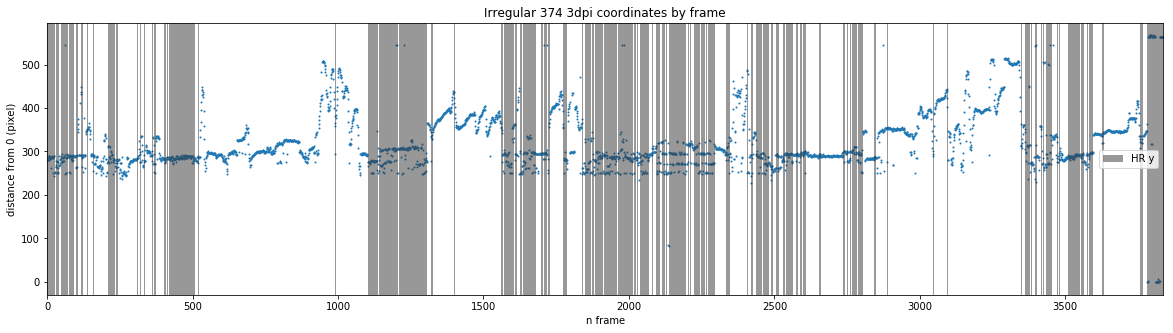

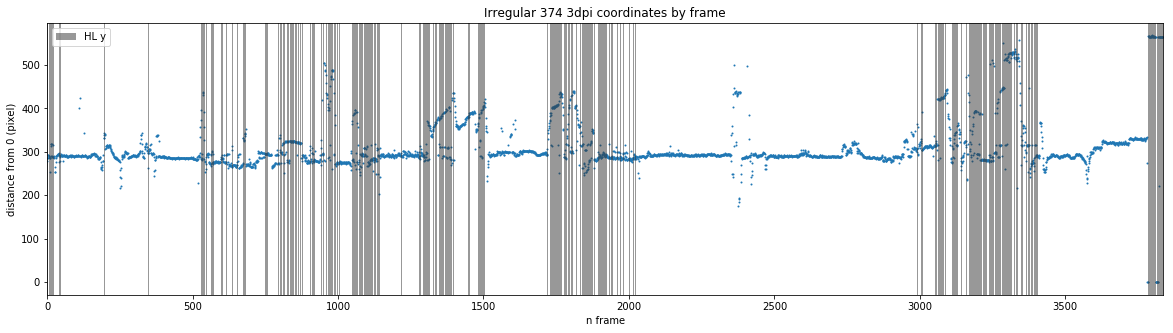

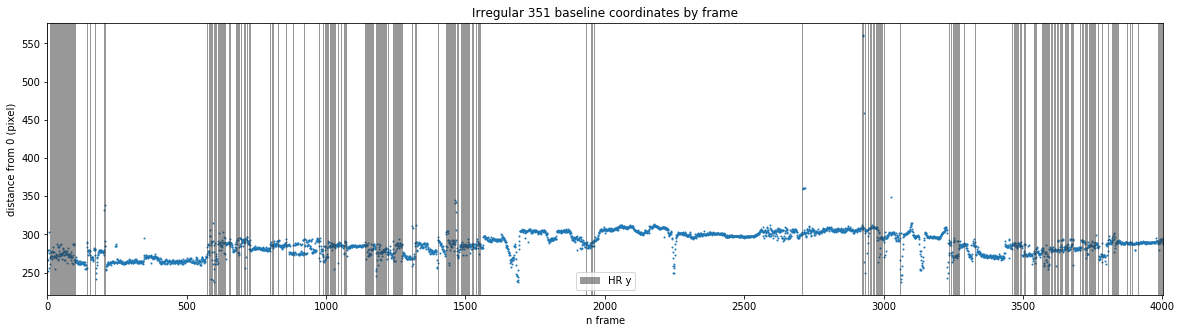

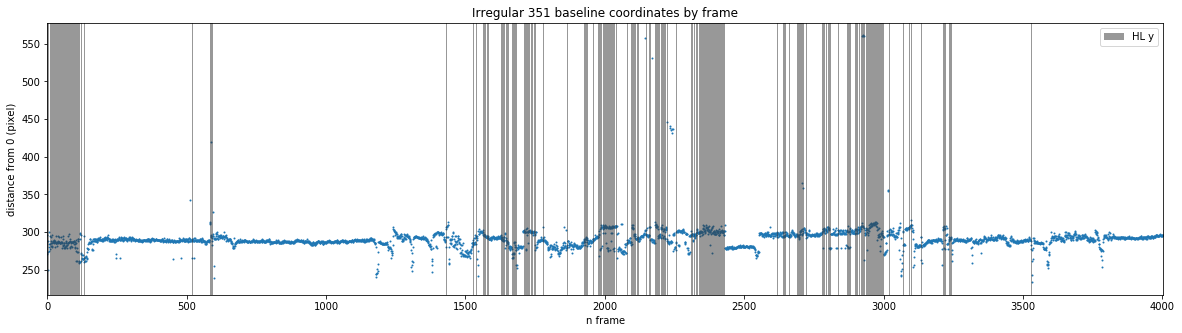

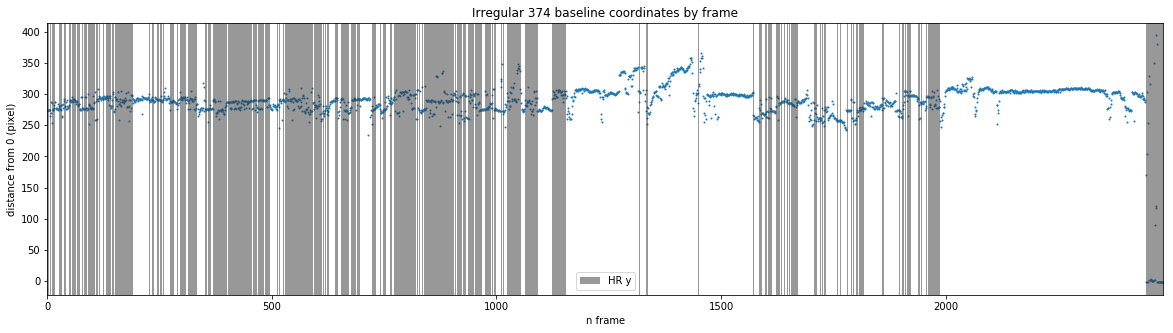

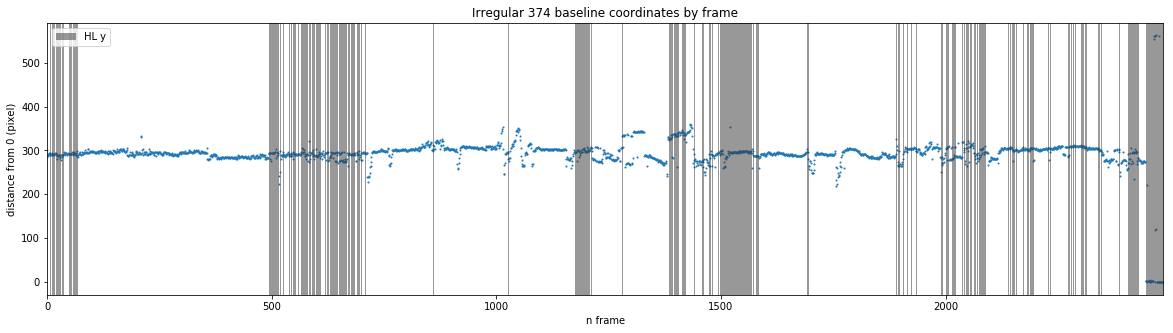

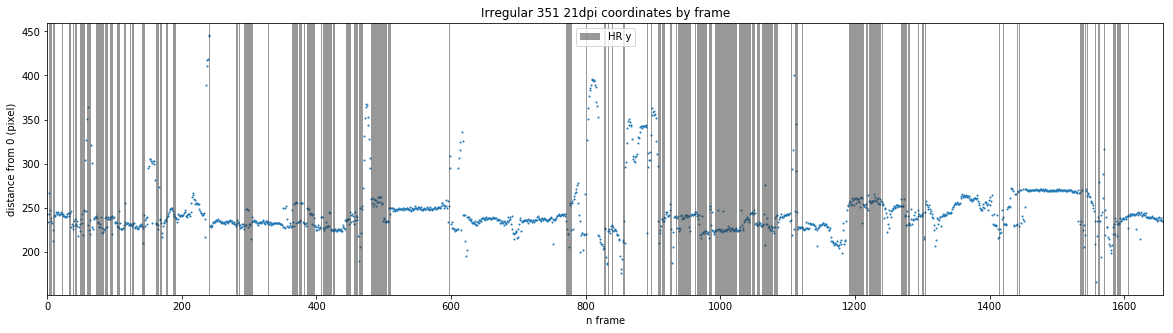

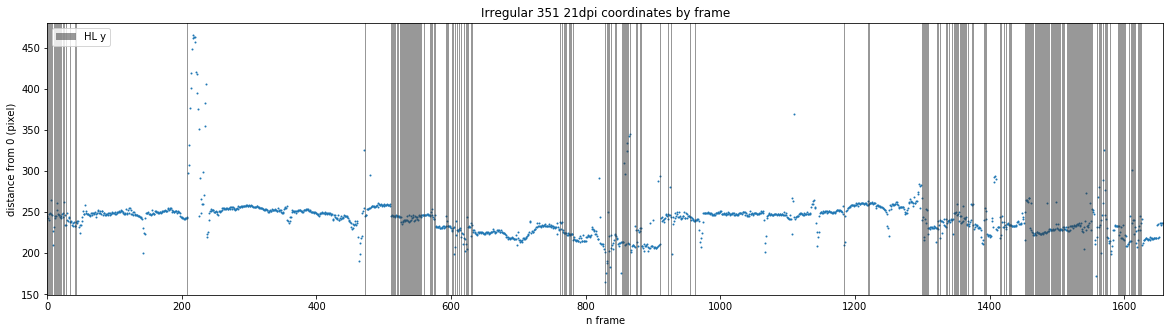

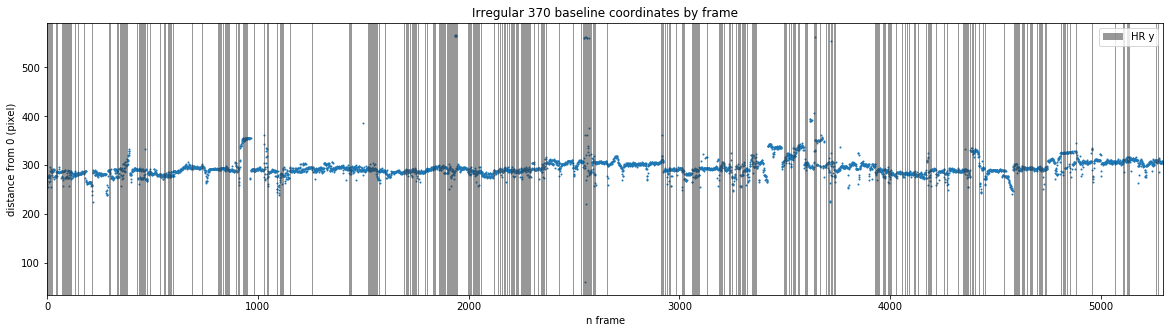

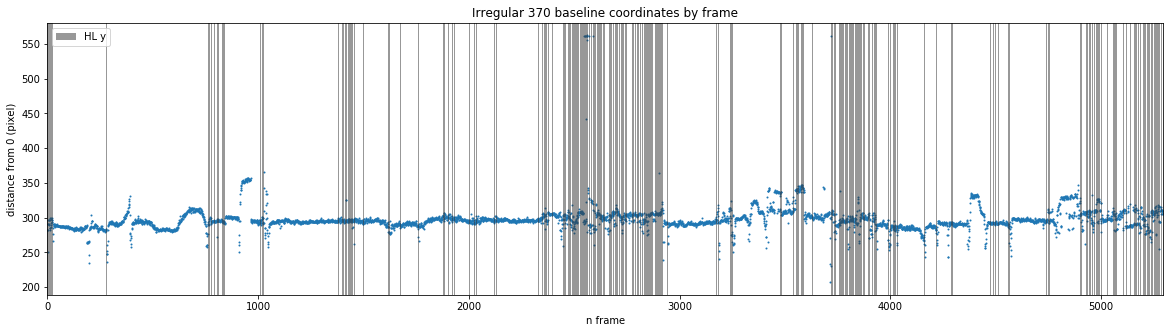

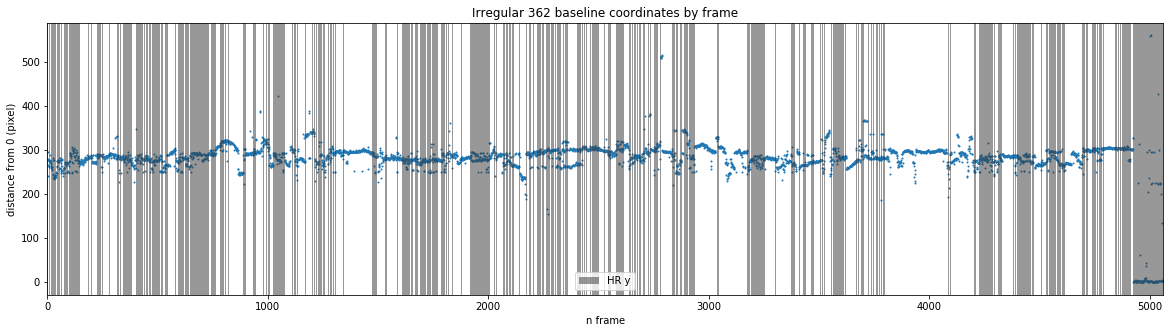

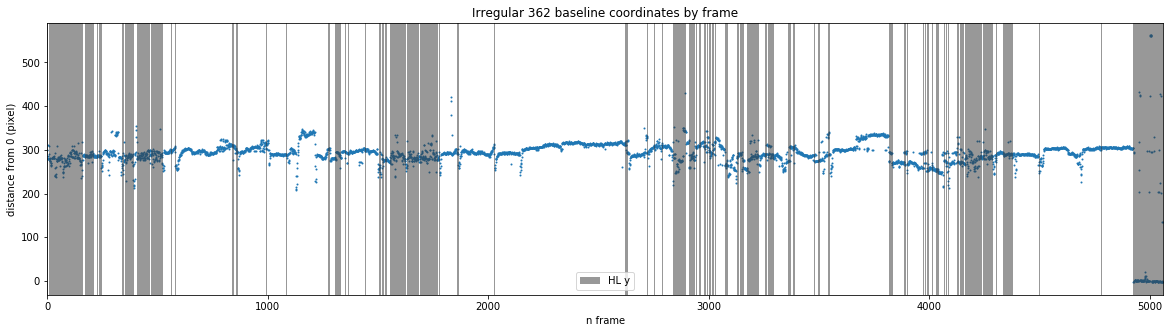

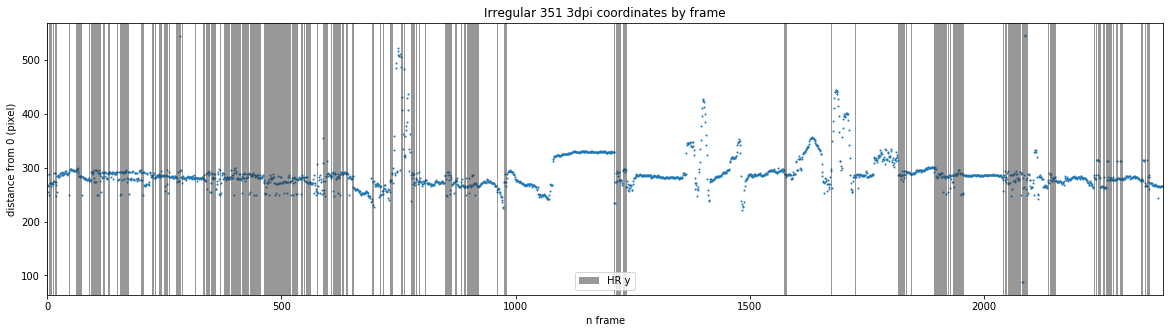

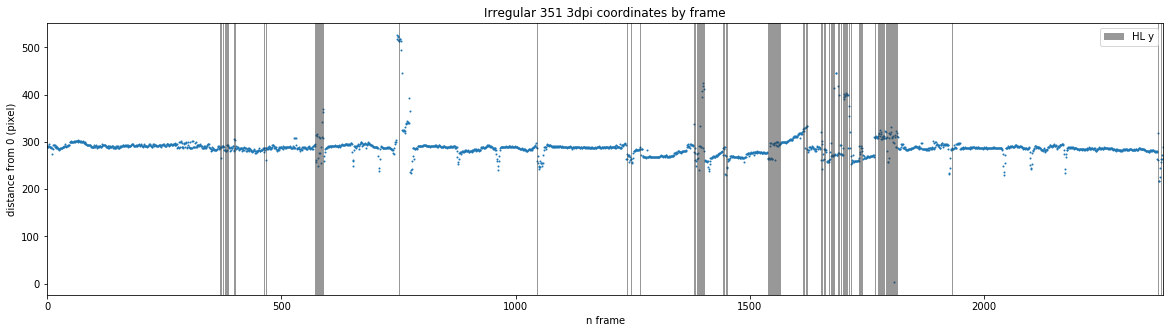

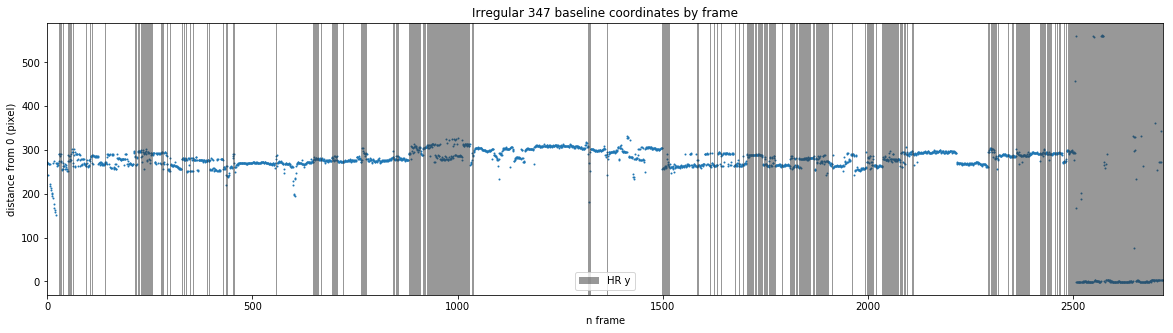

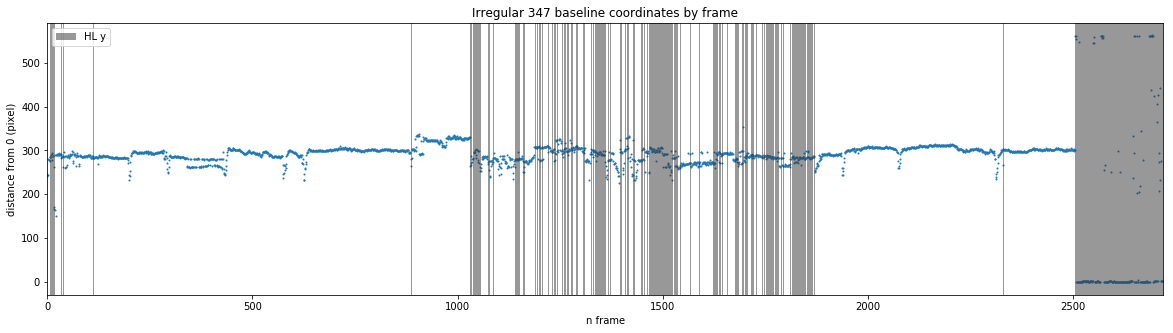

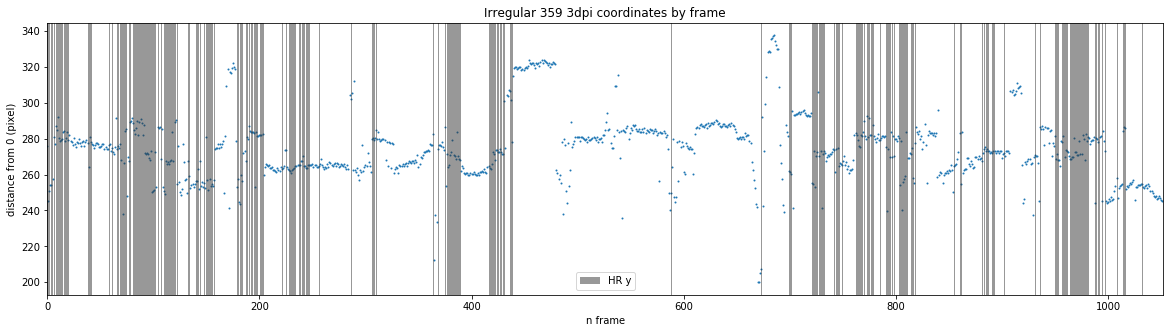

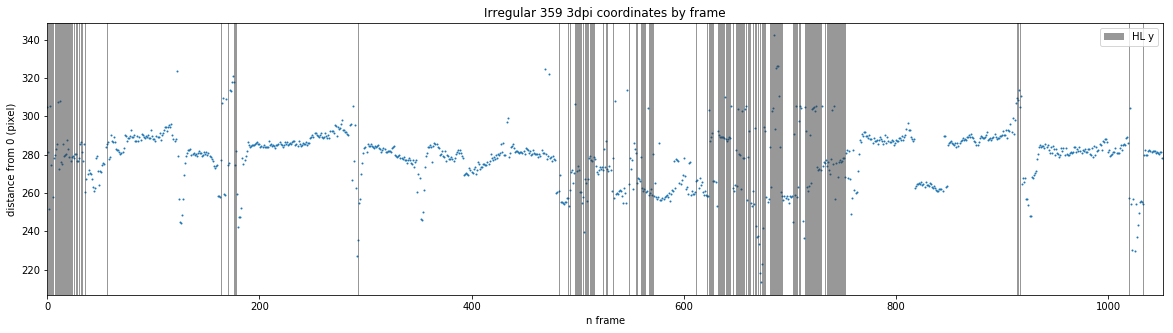

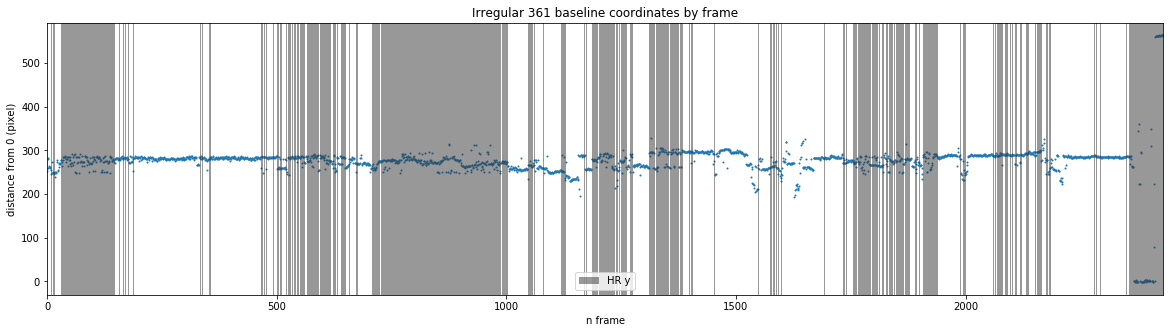

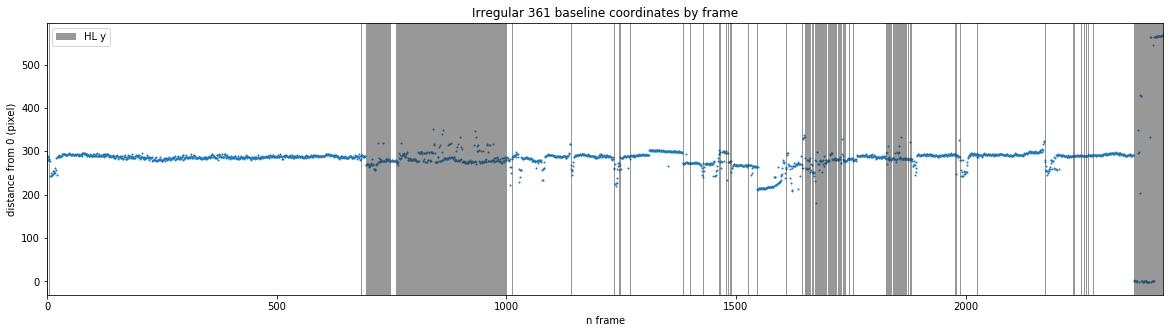

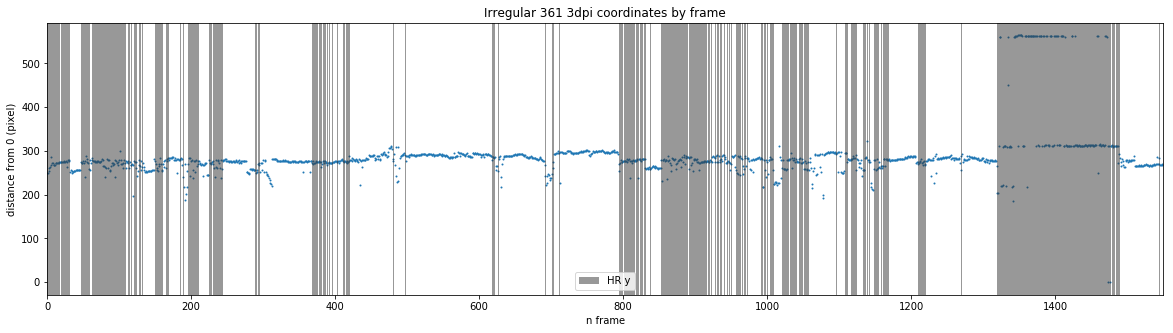

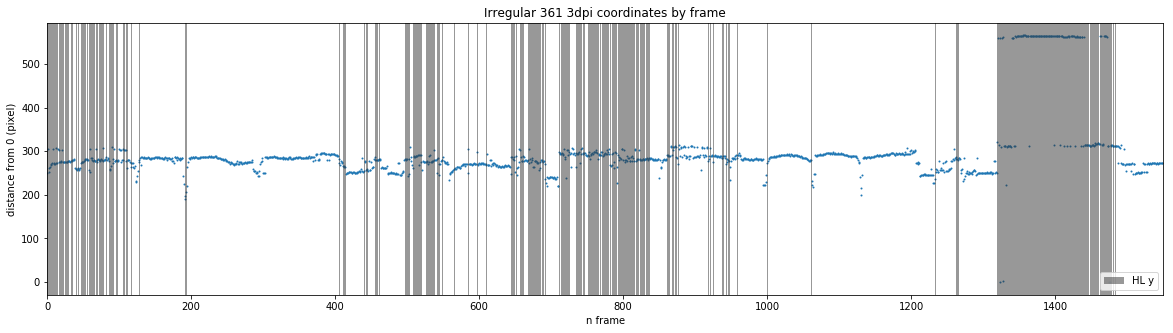

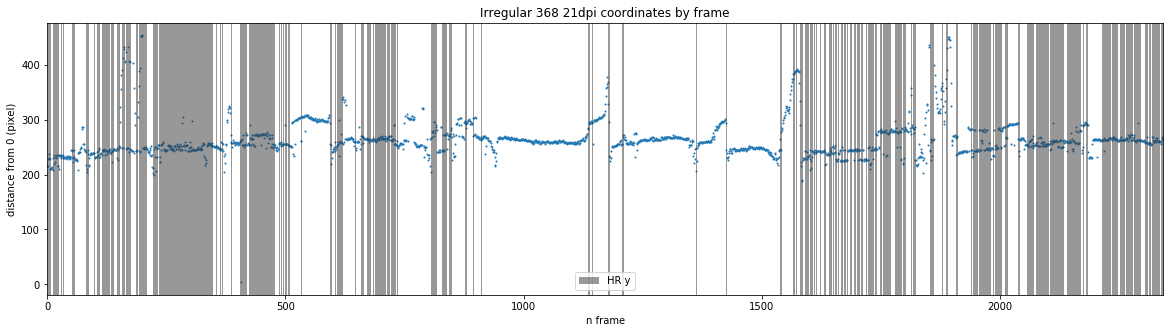

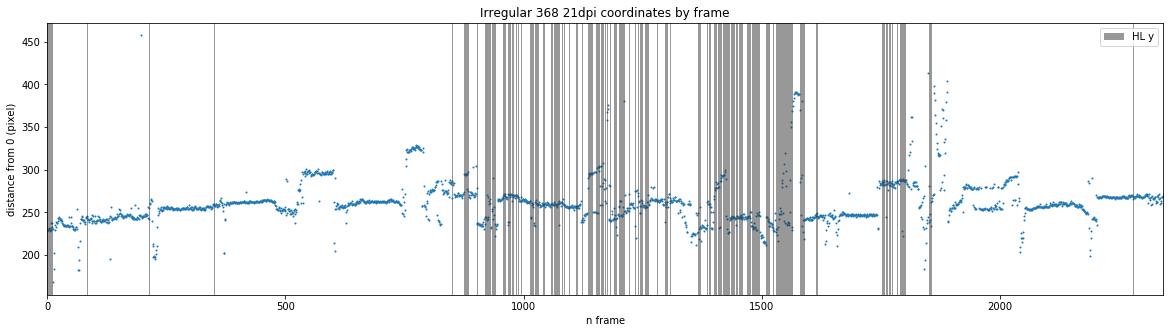

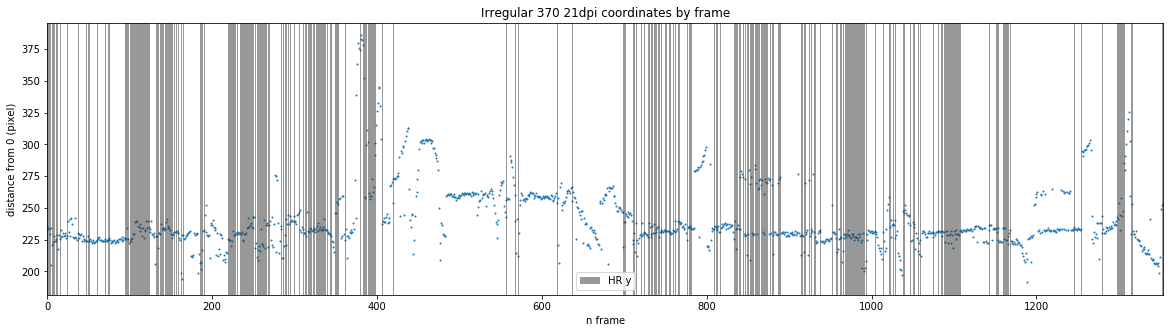

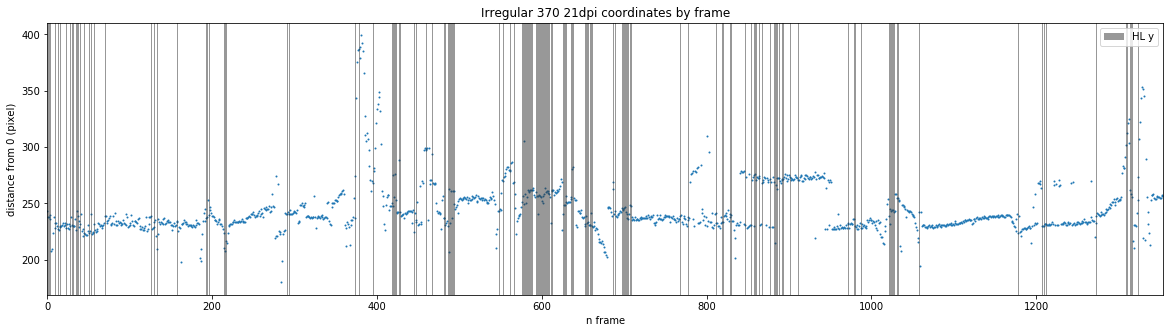

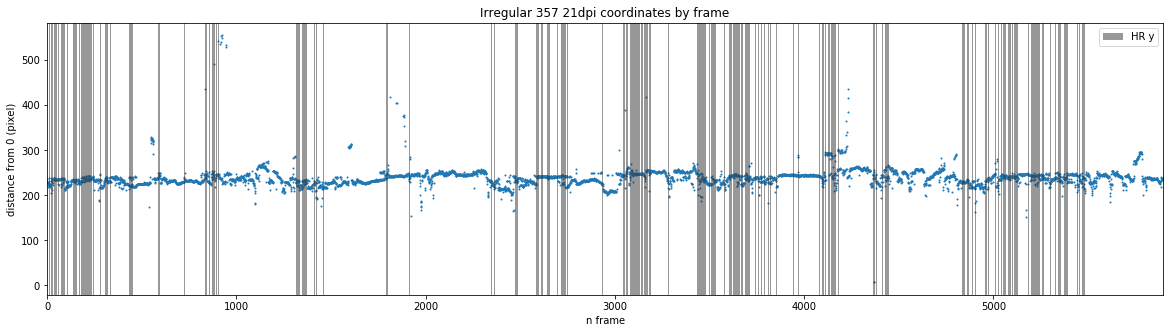

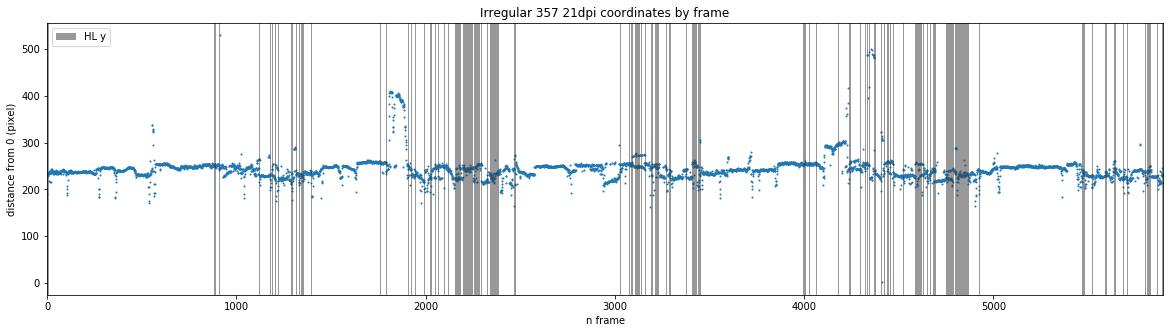

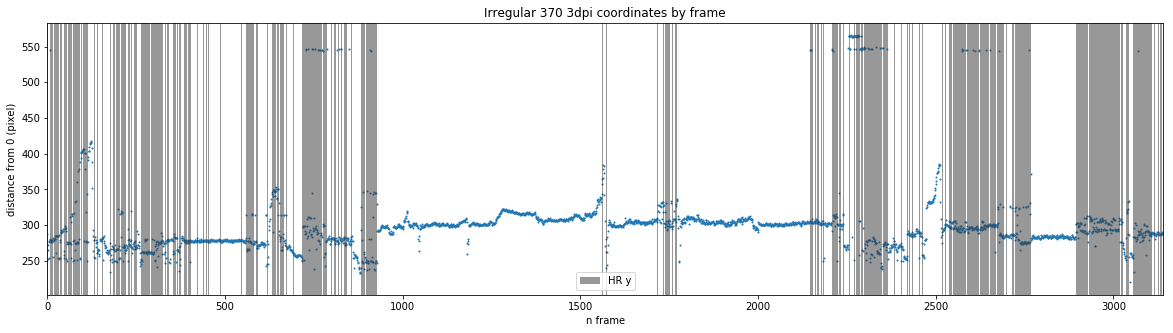

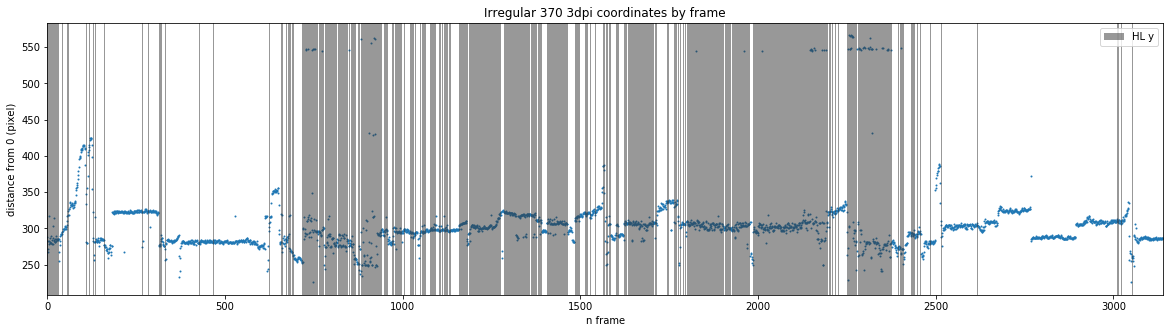

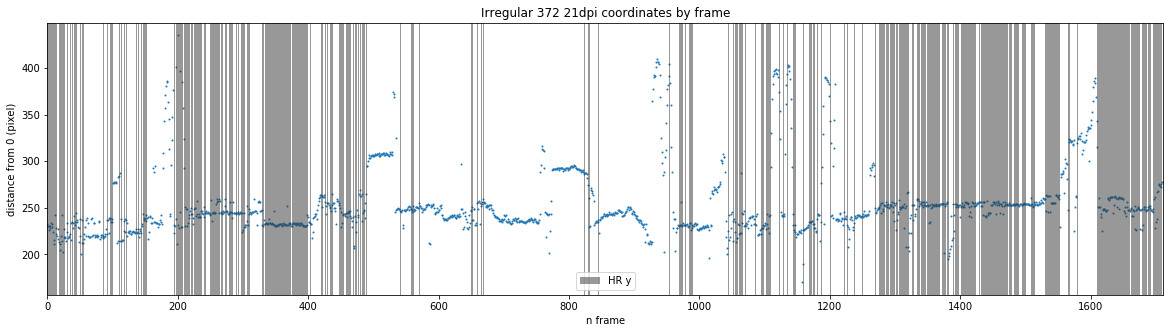

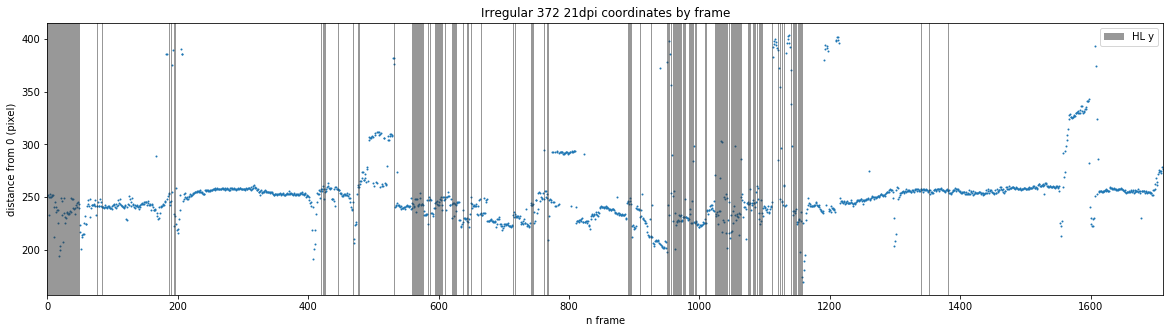

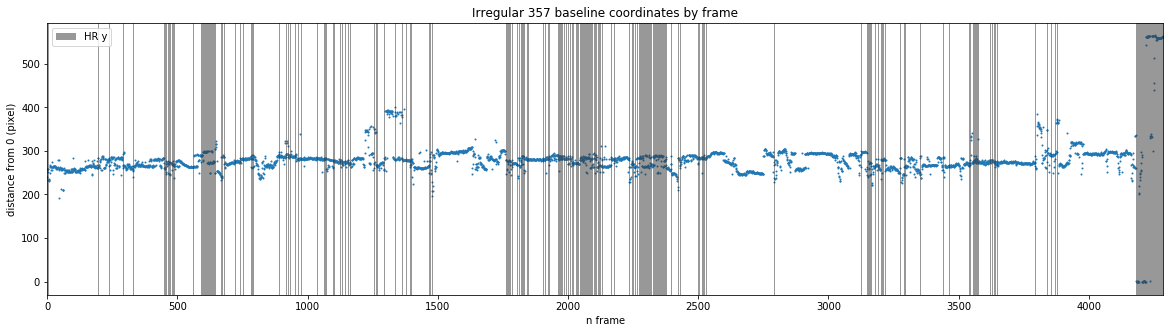

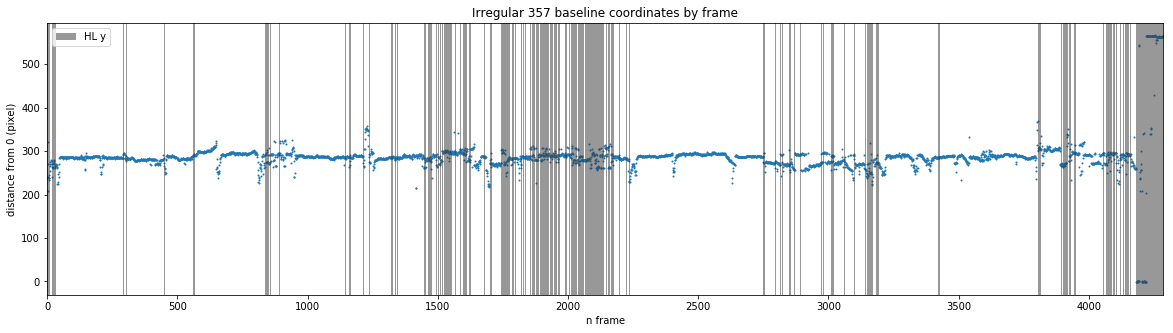

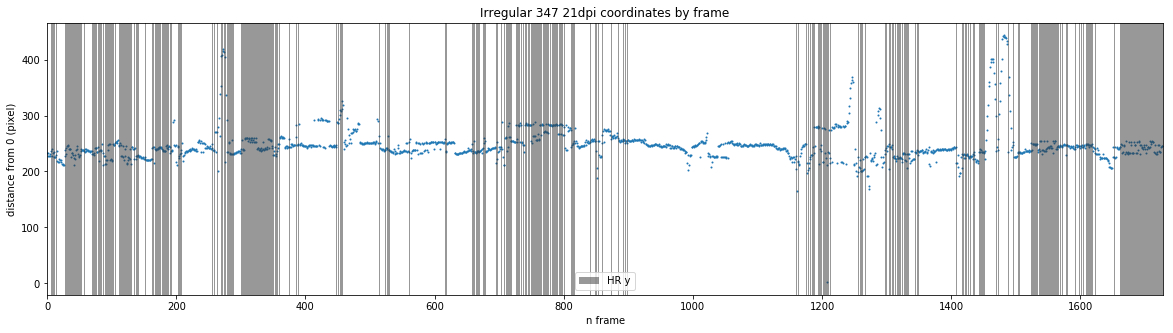

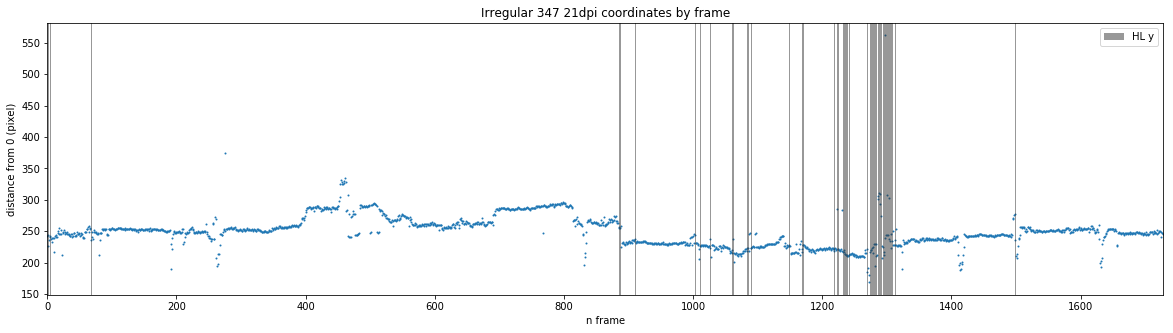

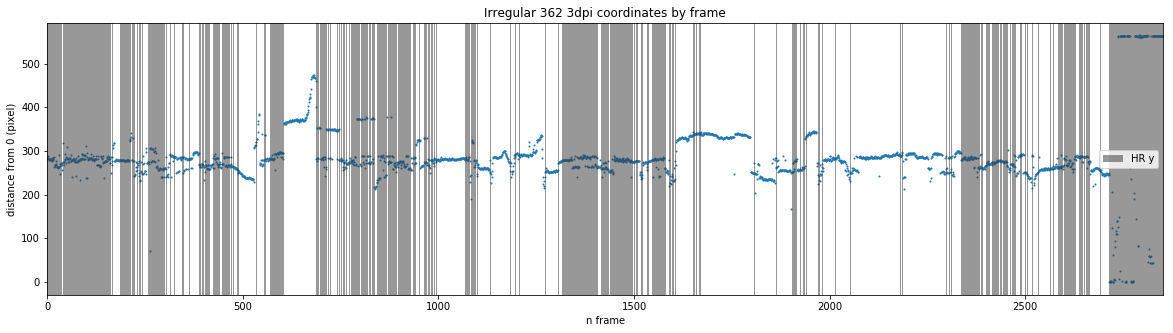

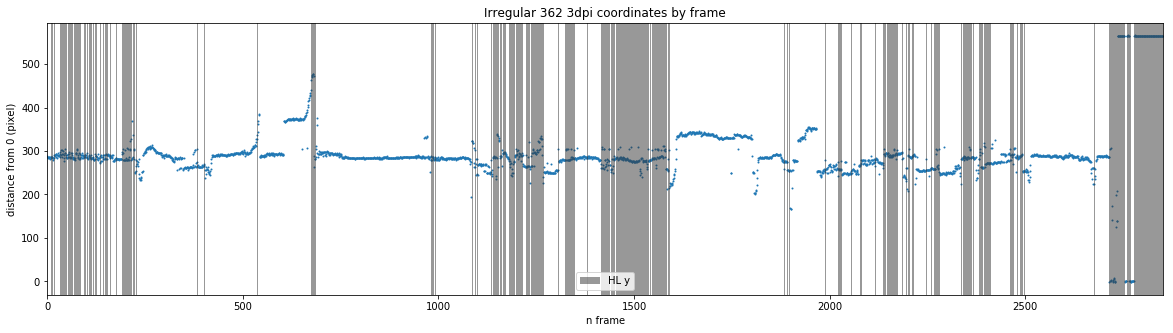

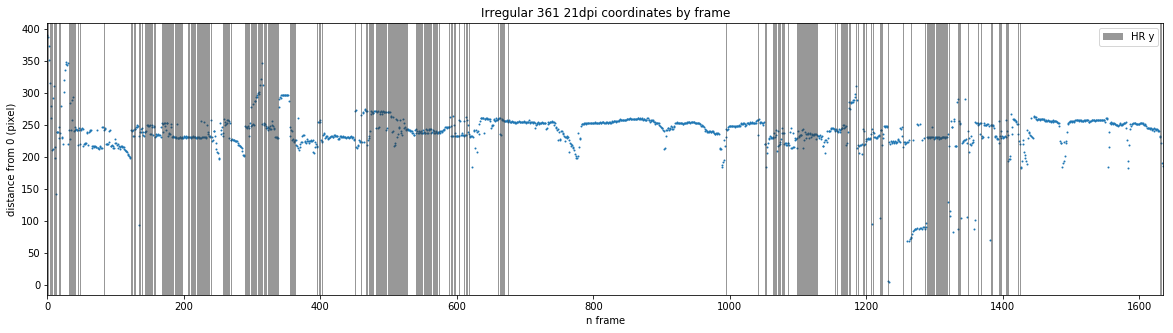

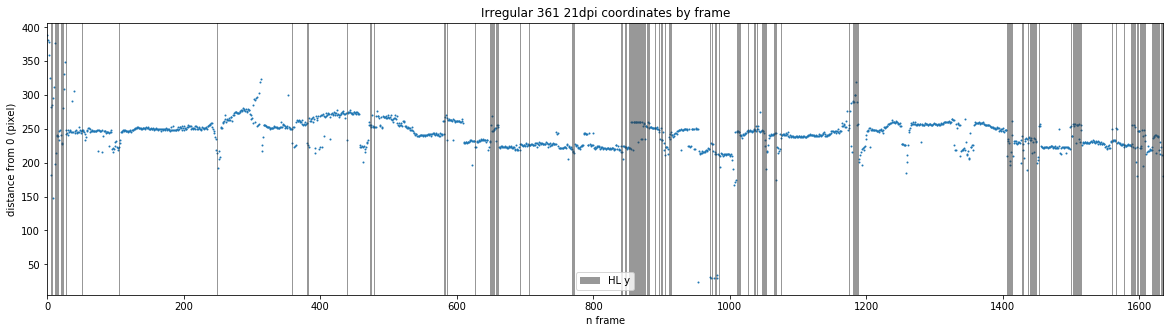

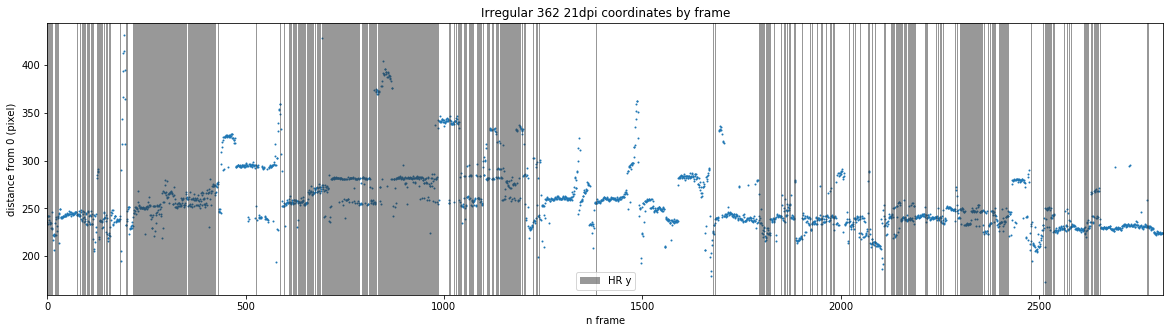

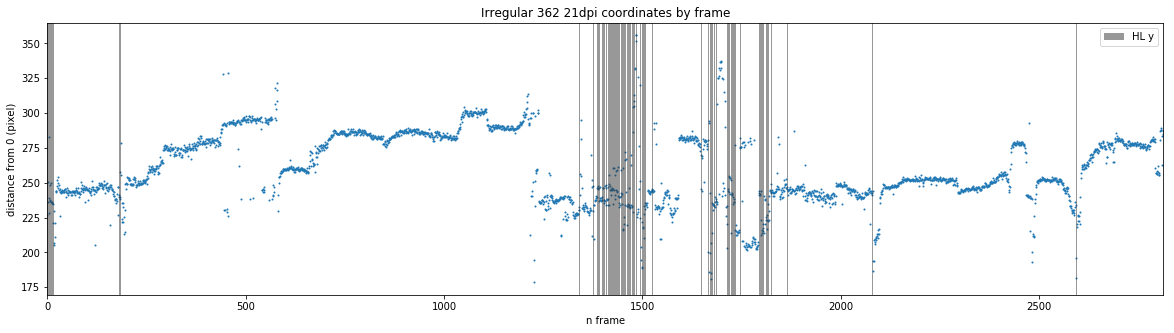

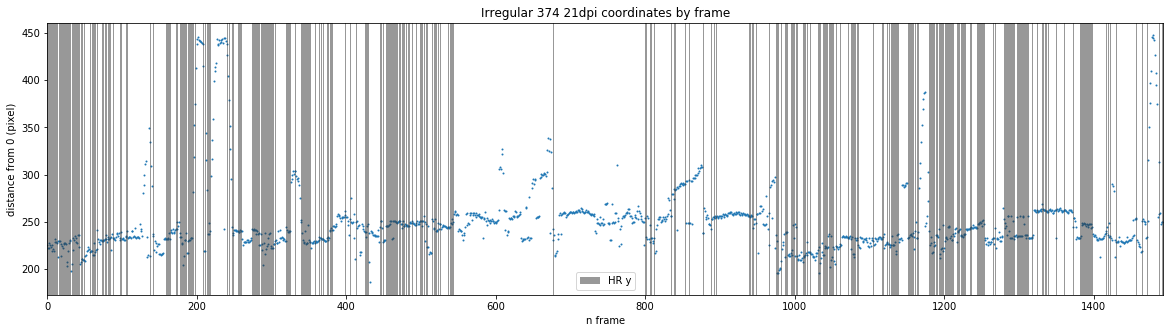

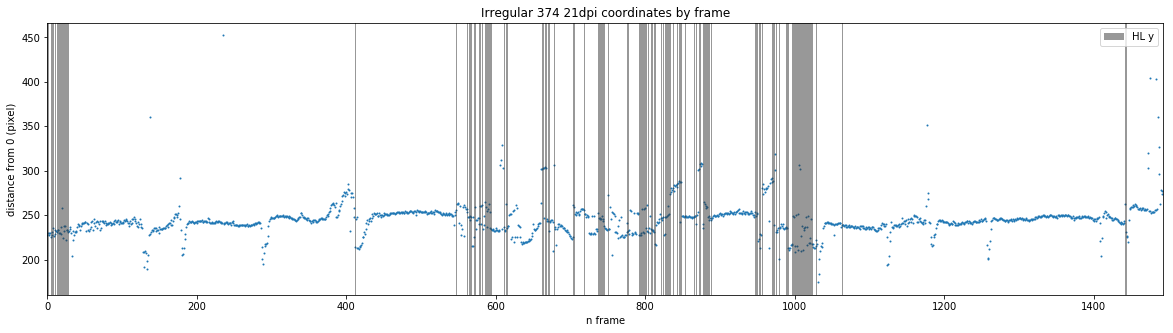

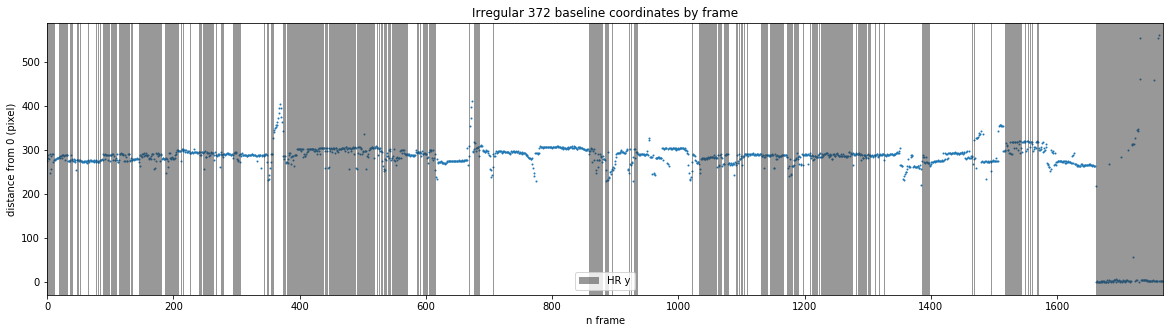

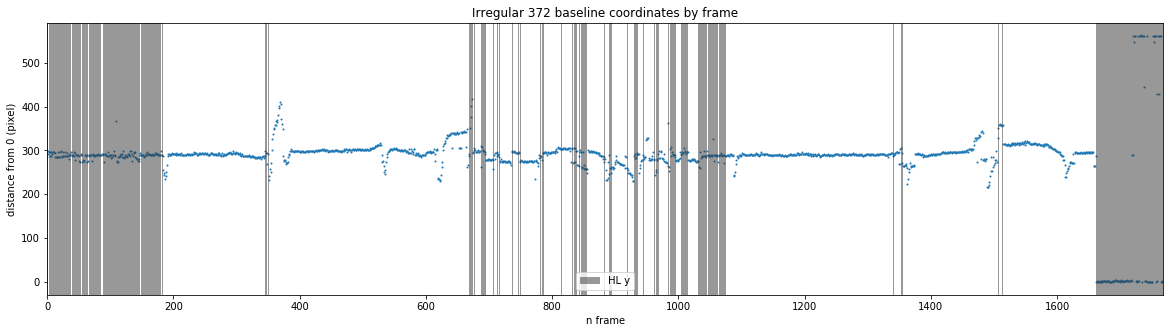

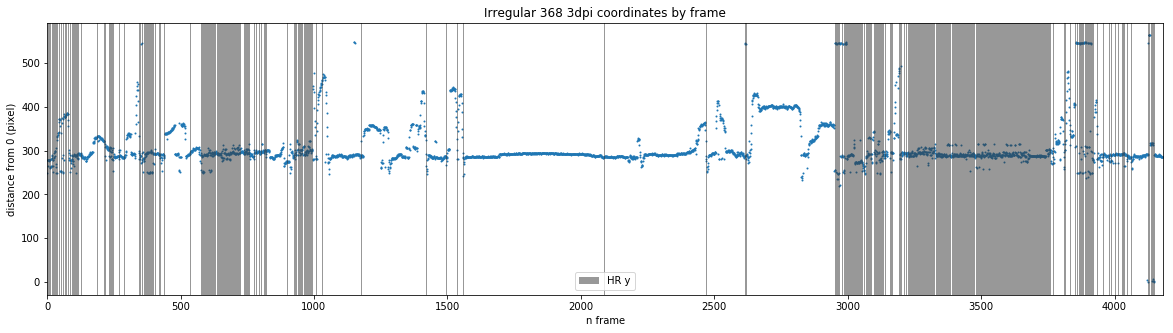

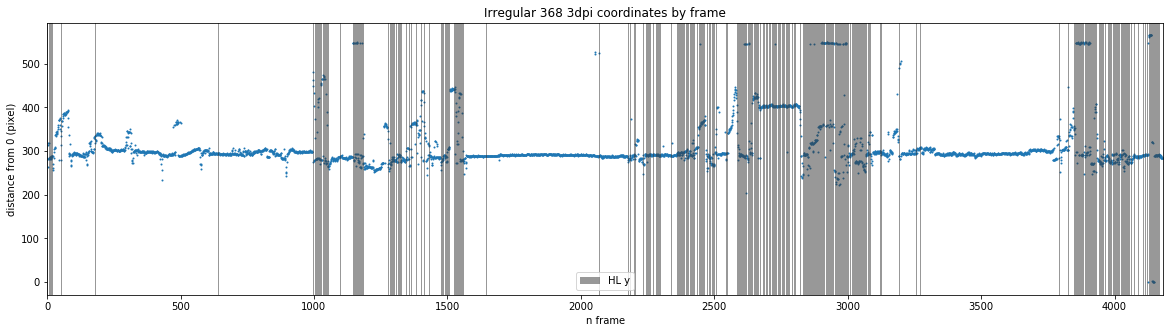

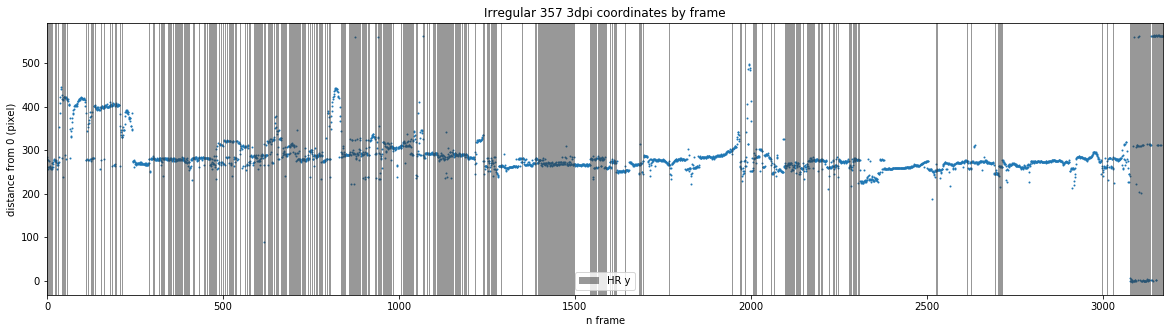

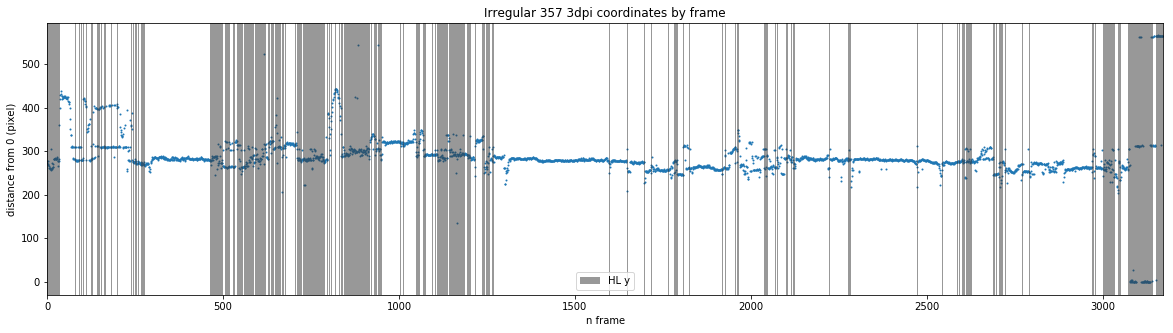

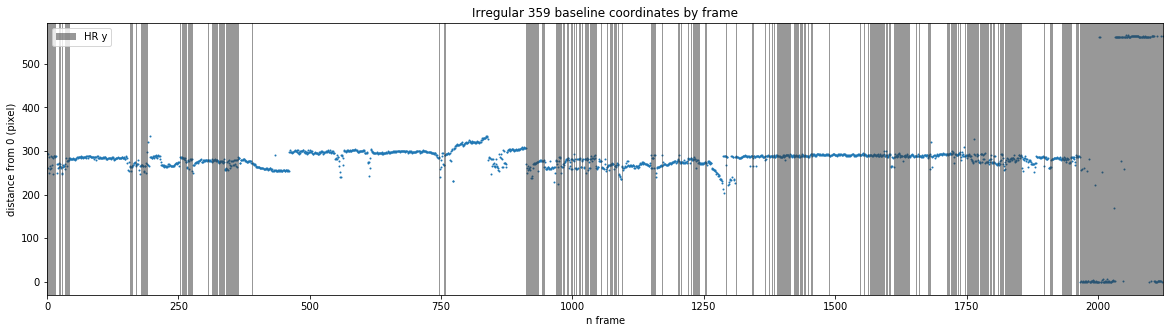

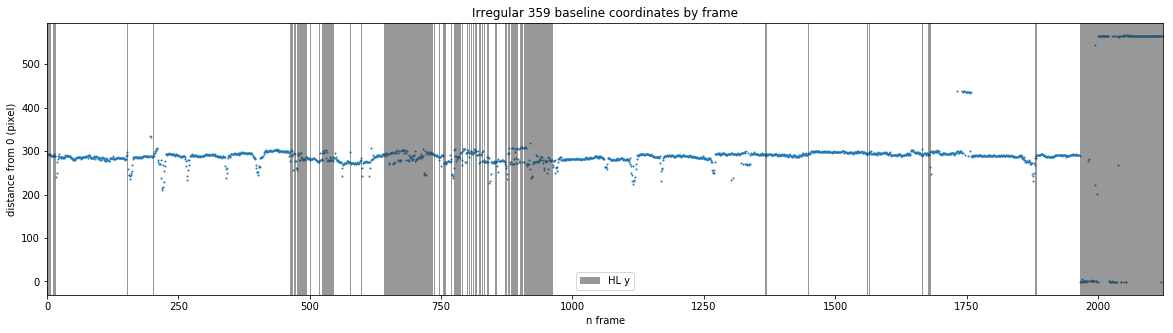

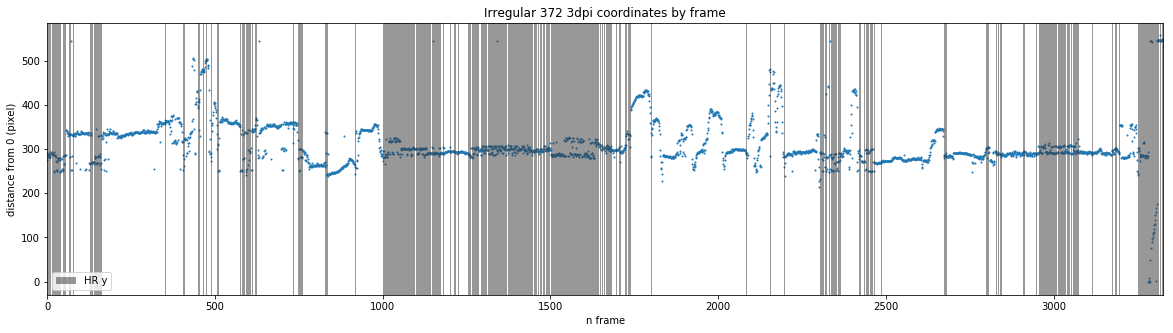

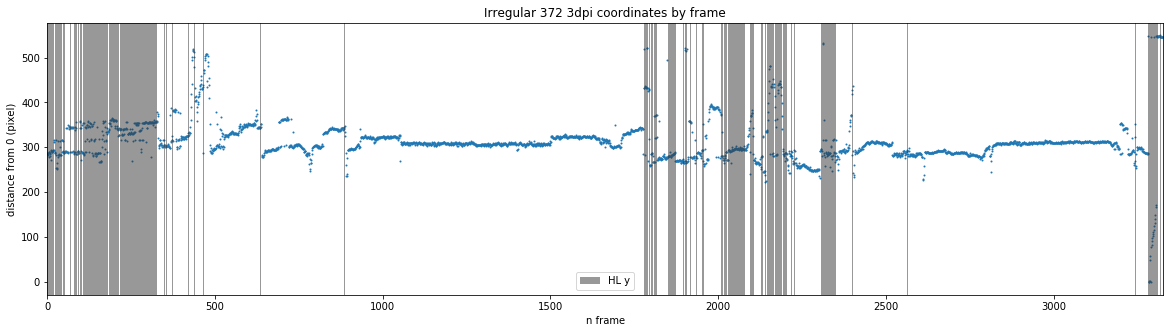

In [6]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.1)

    plt.xlim((start, end))

    plot_data(df, 'HL', start, end, filename, 'y', 0.1)

    plt.xlim((start, end))

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


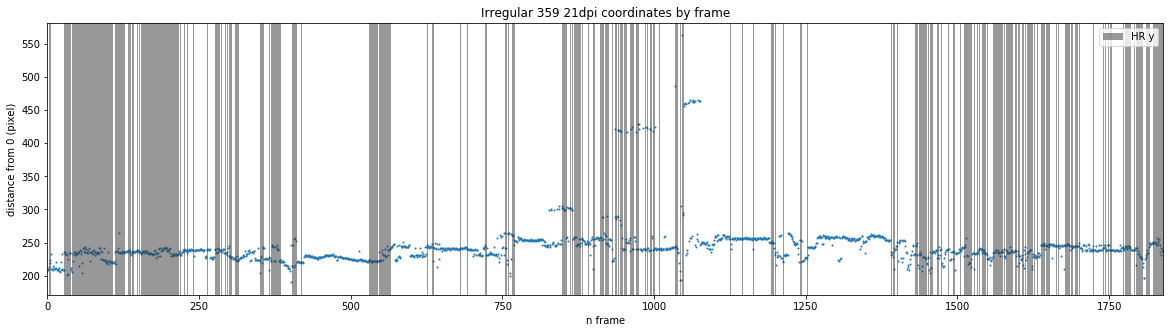

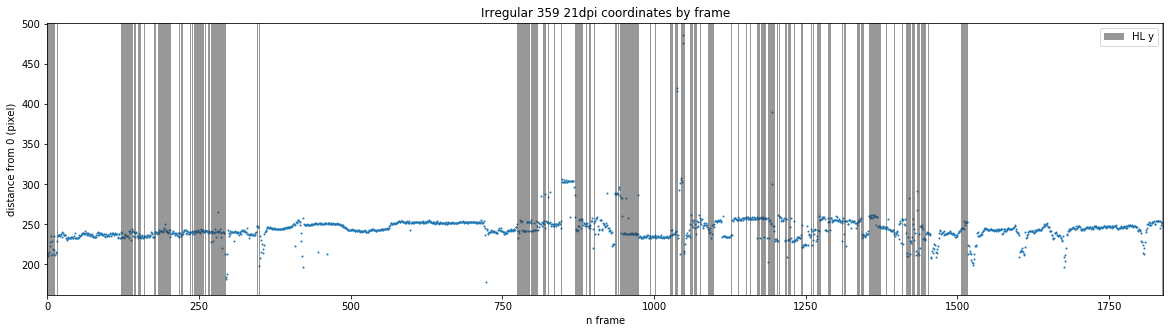

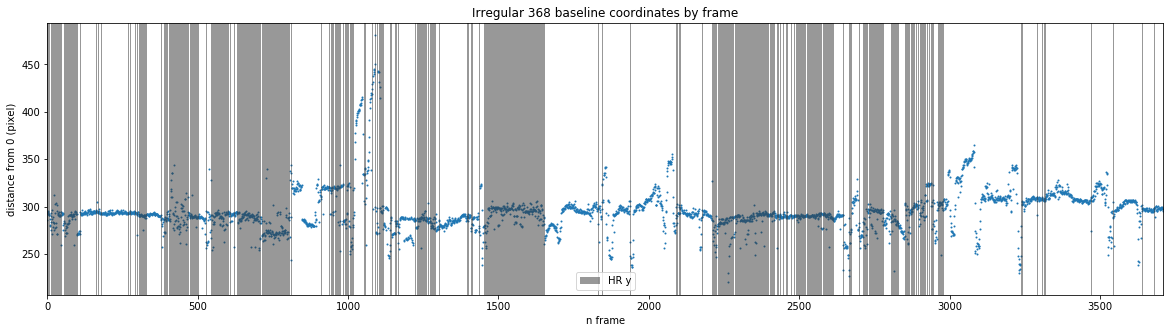

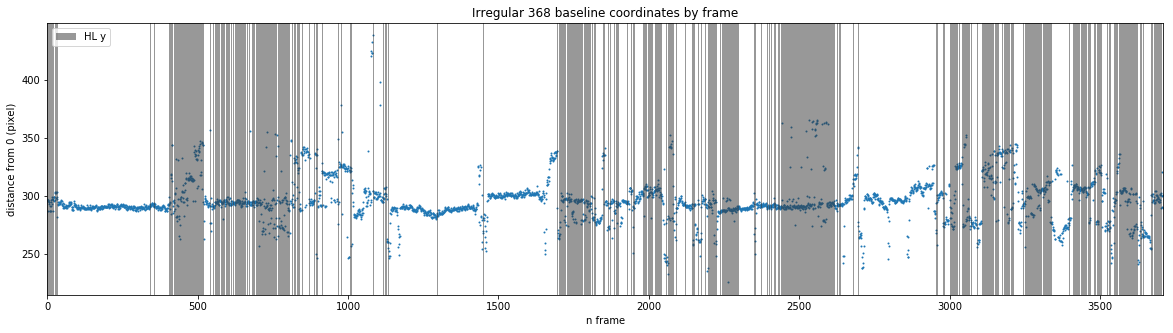

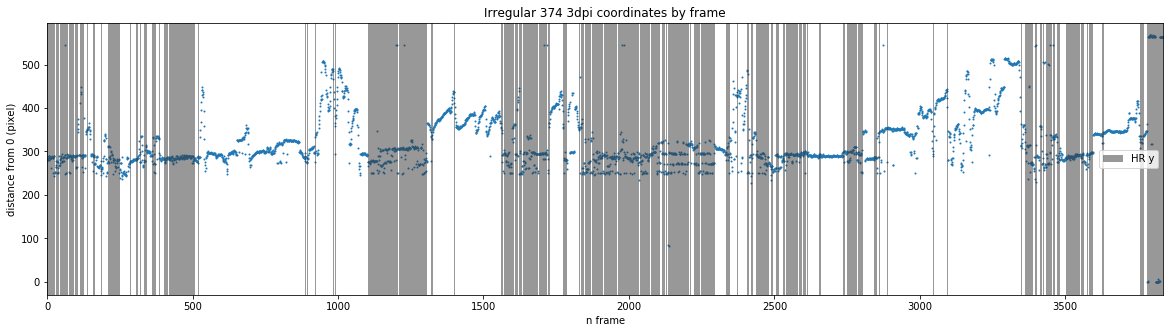

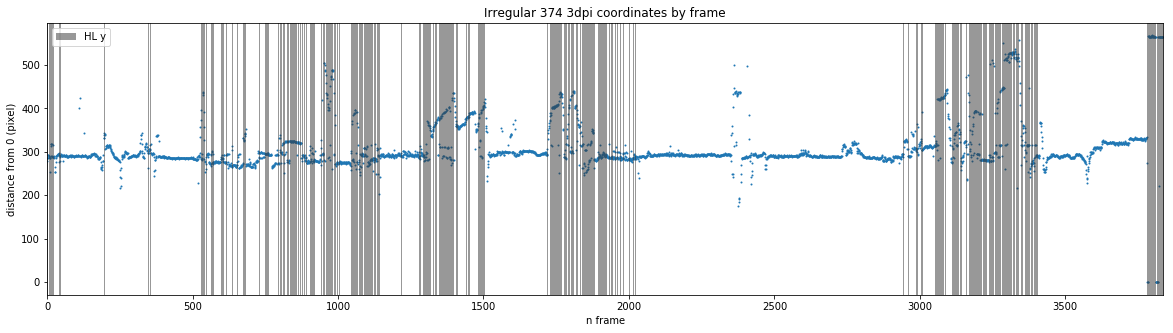

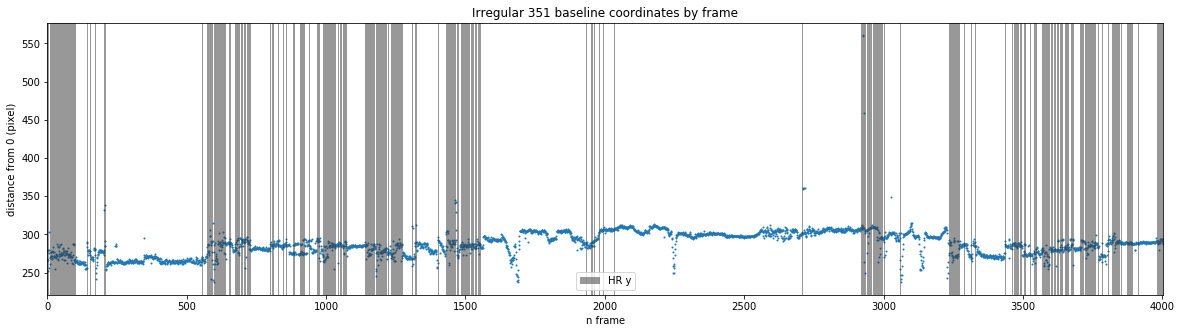

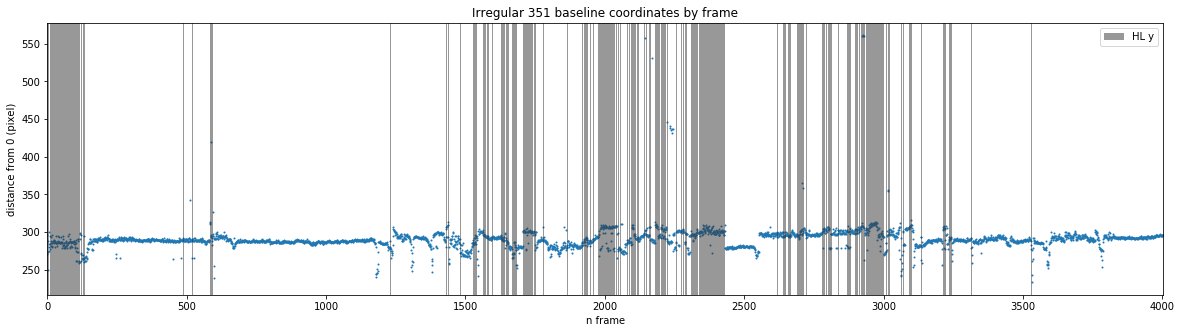

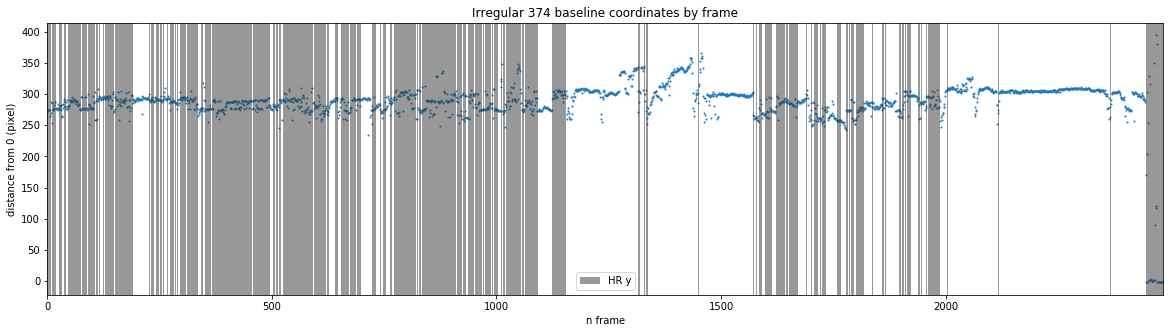

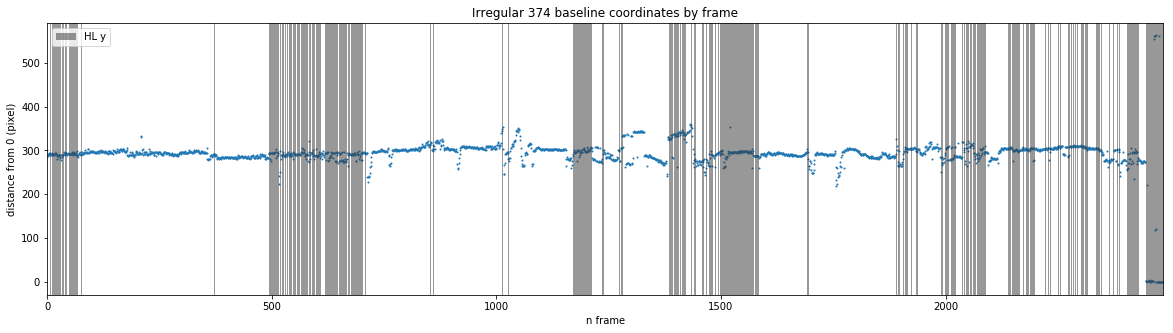

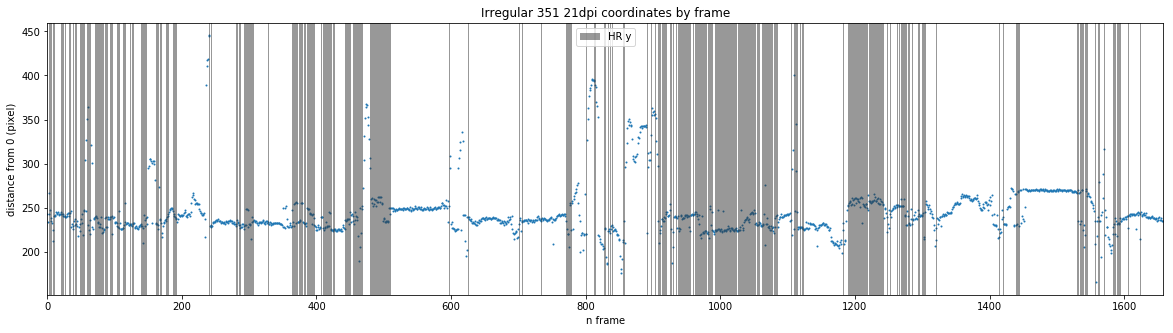

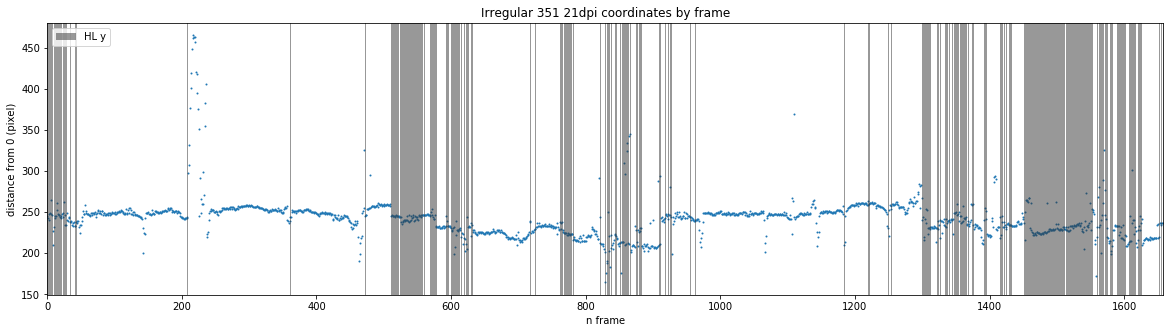

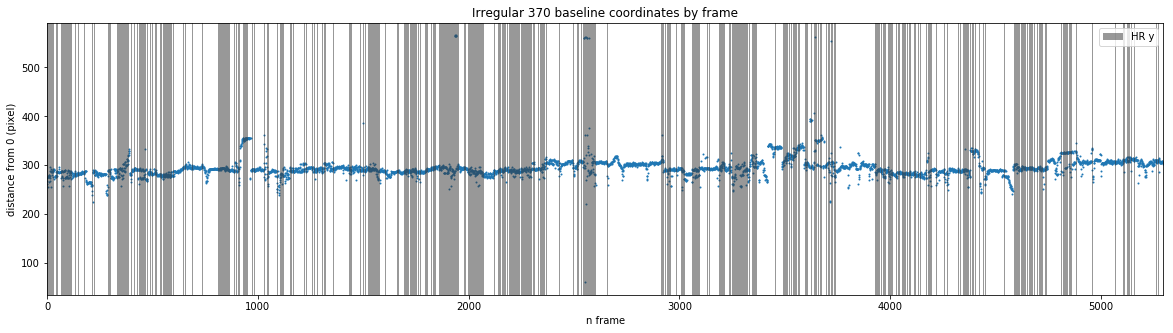

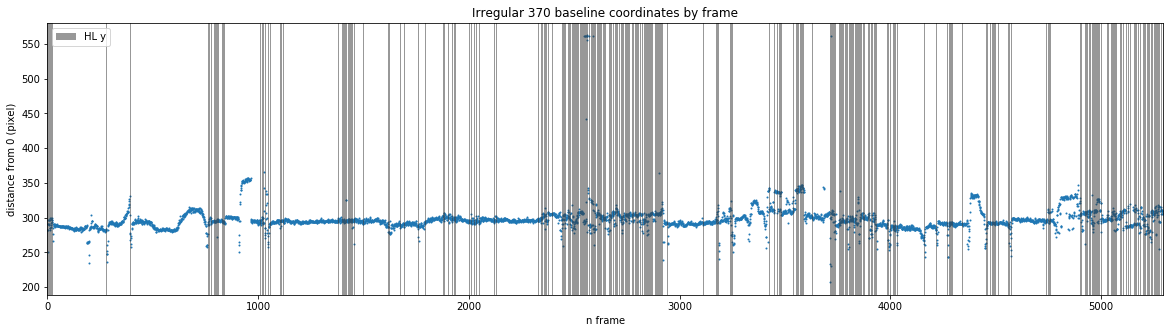

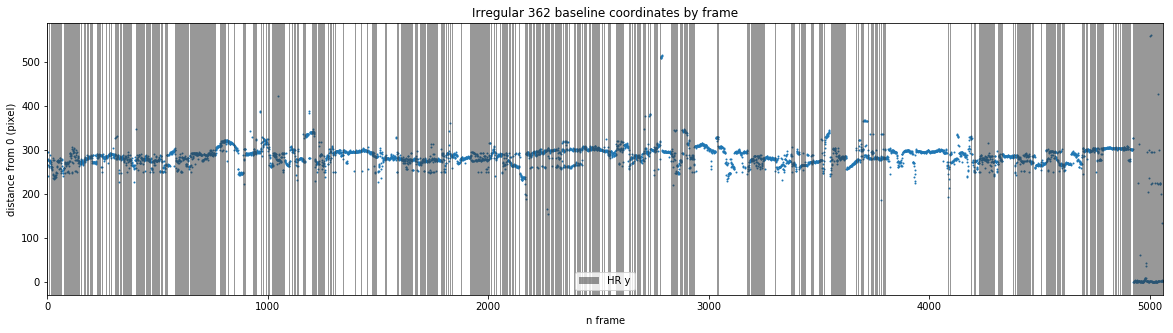

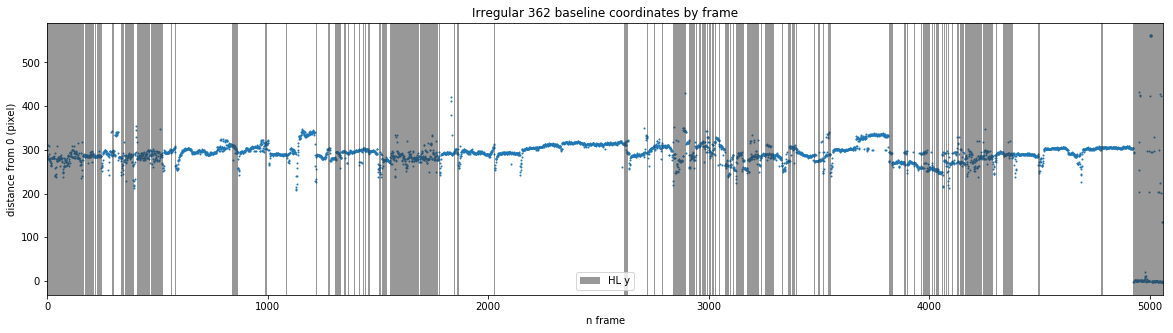

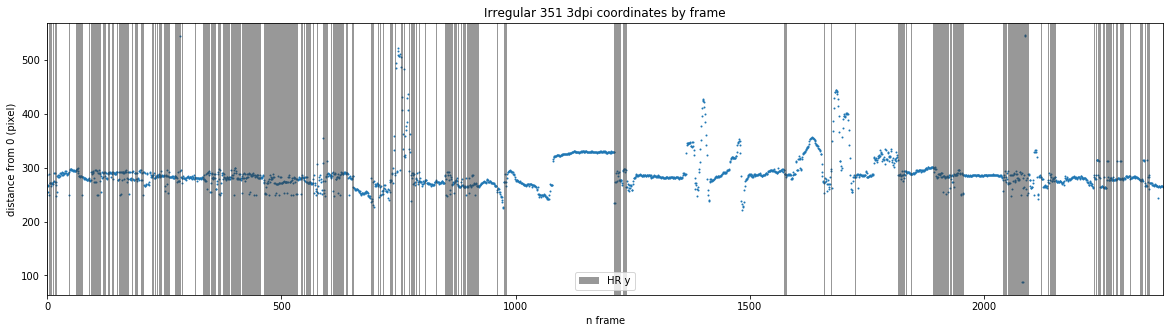

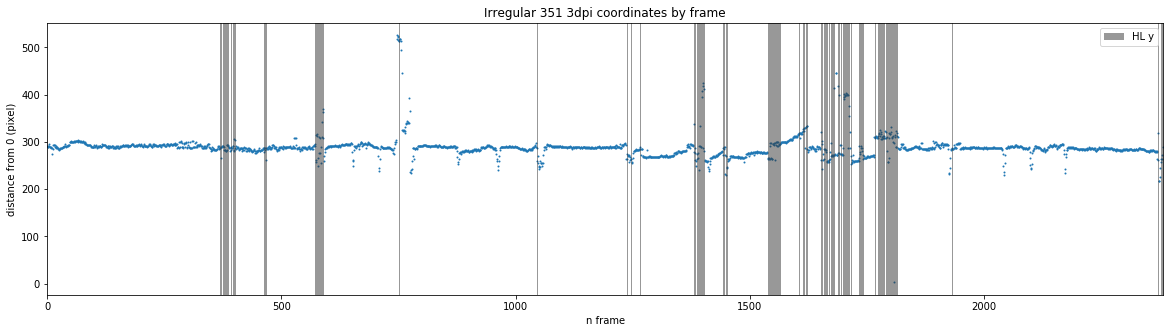

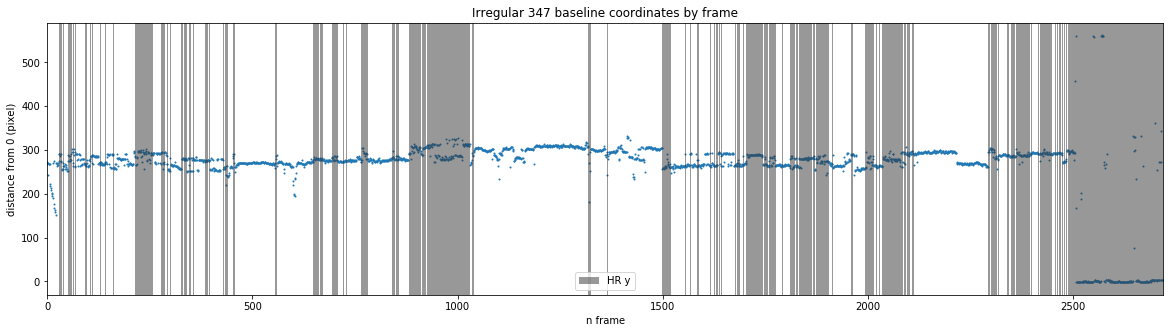

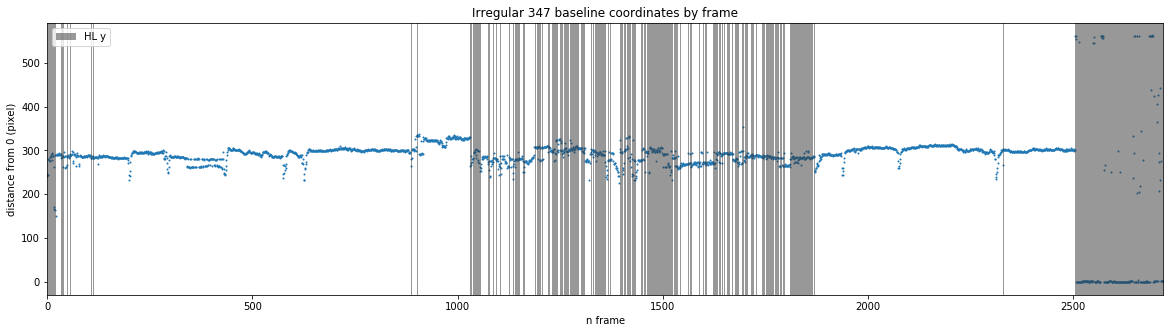

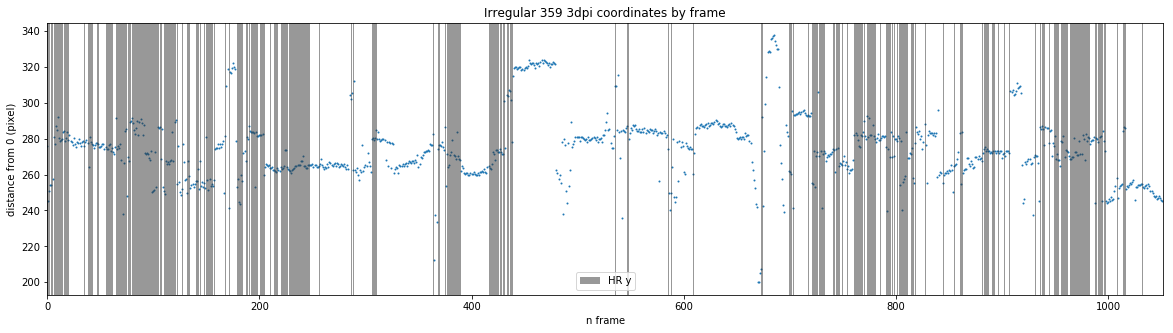

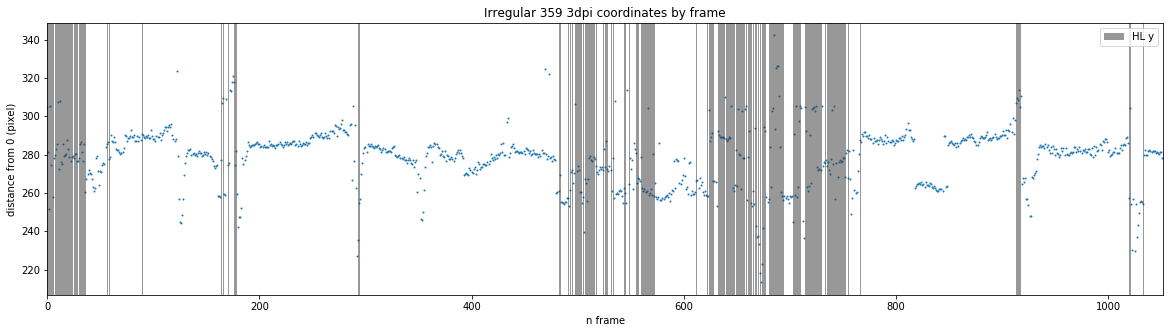

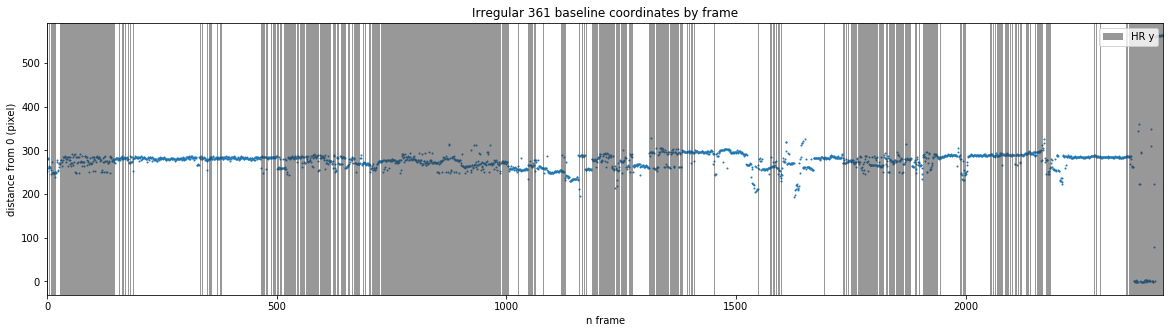

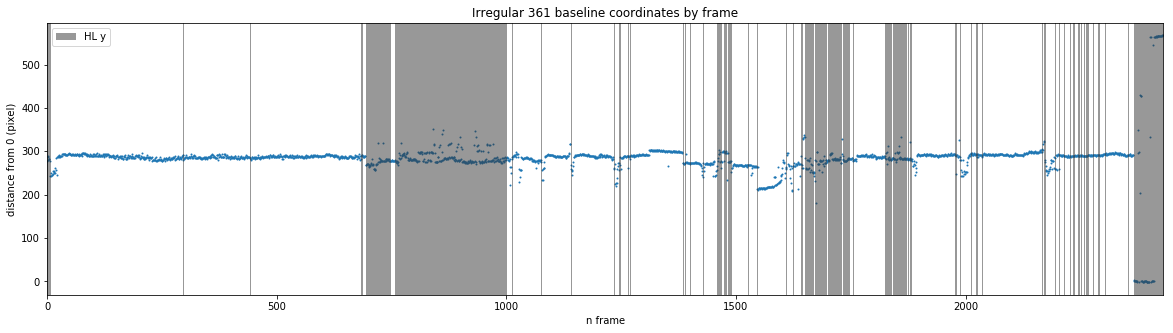

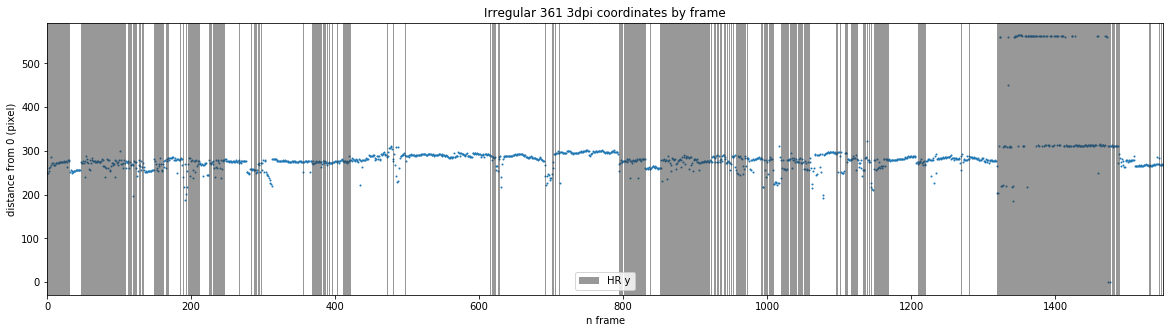

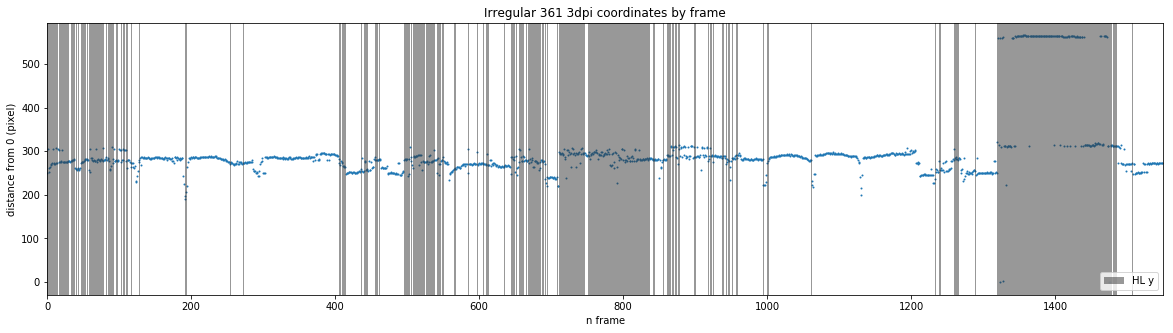

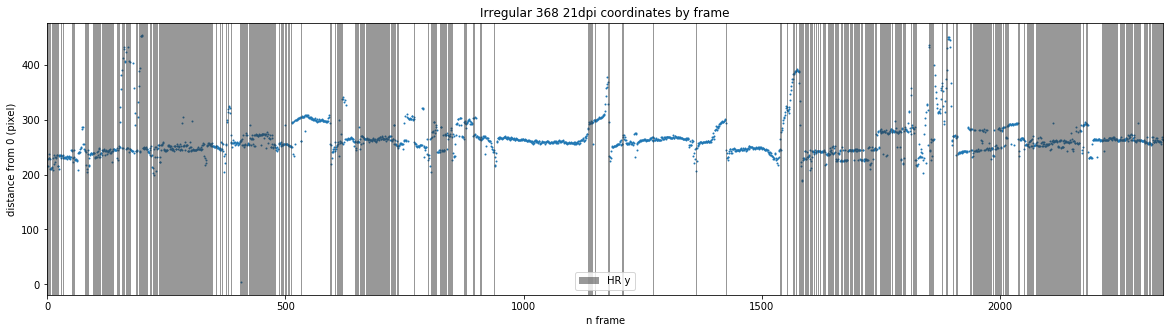

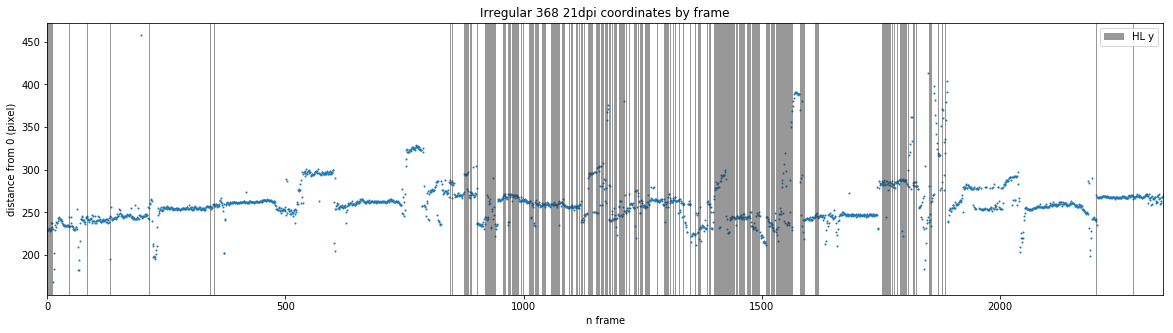

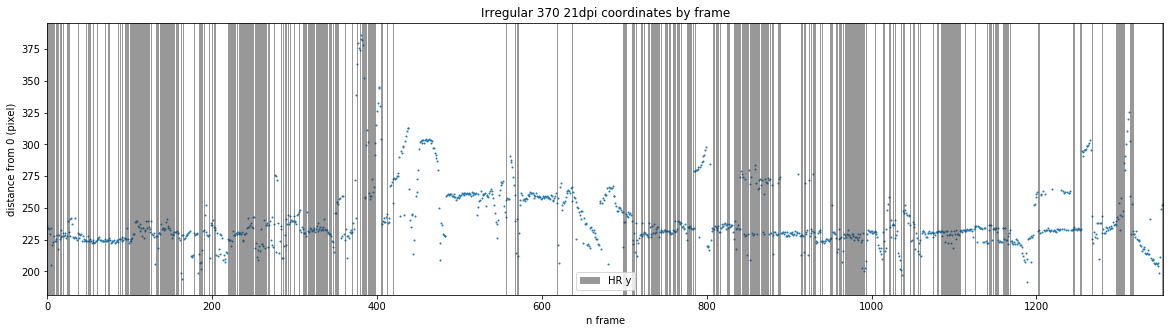

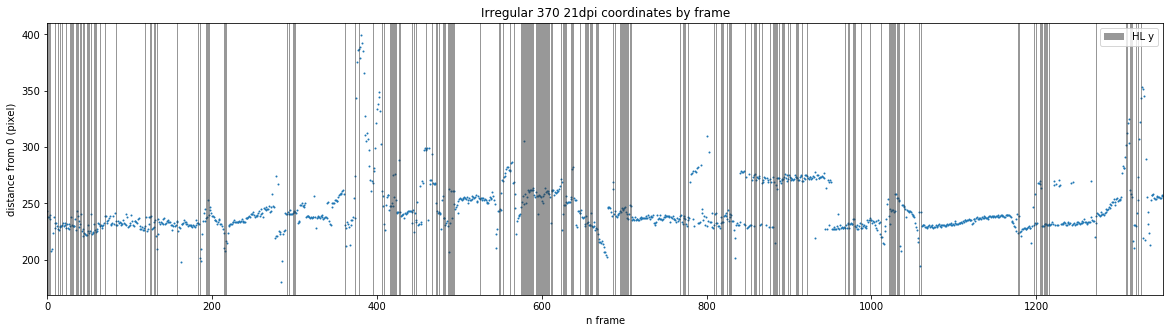

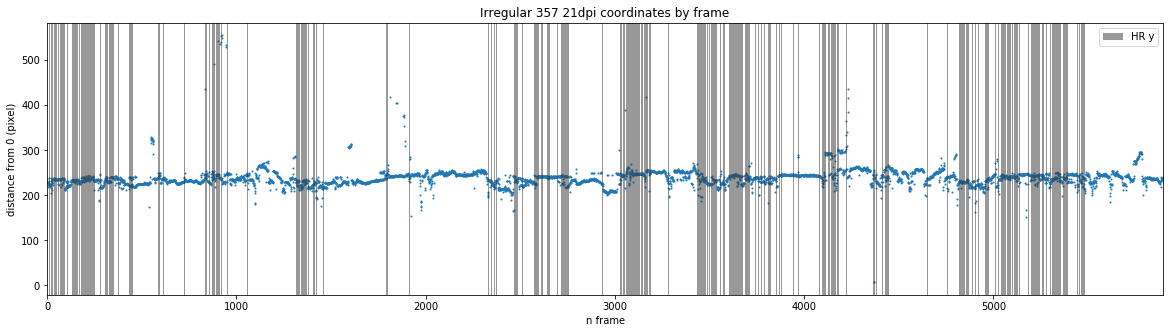

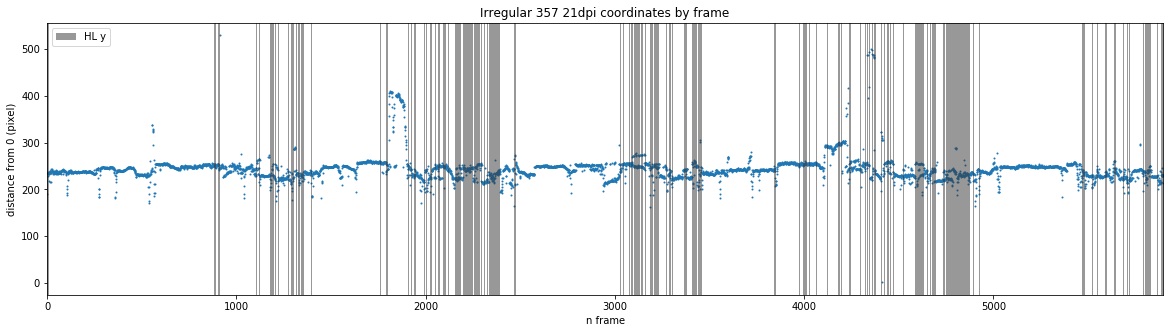

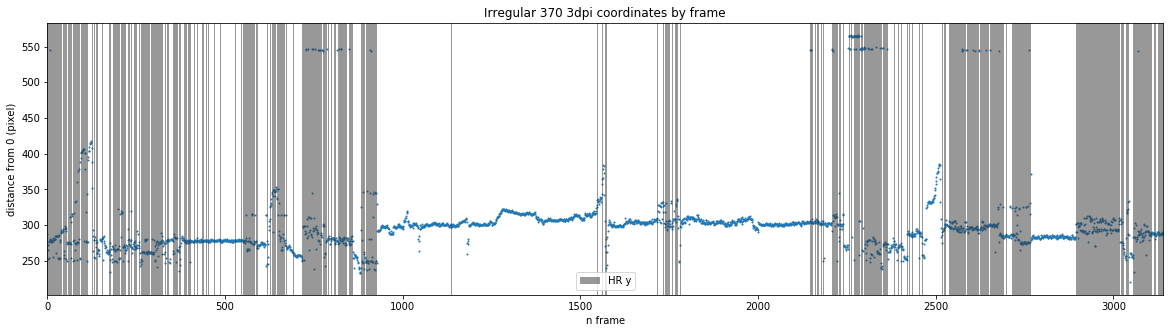

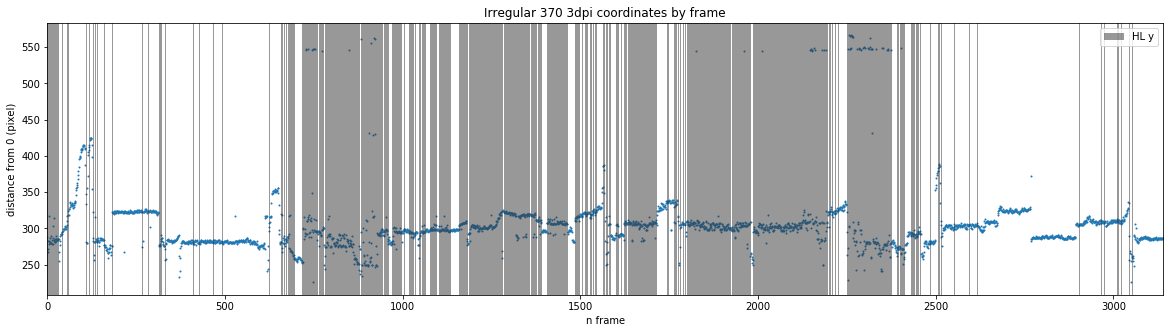

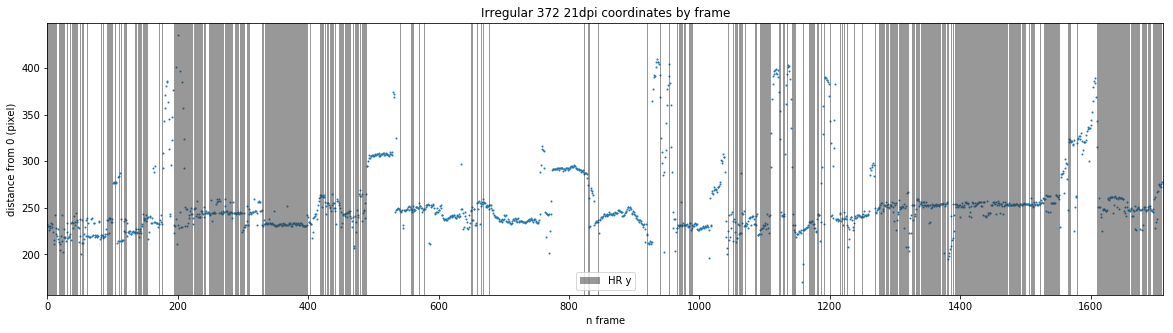

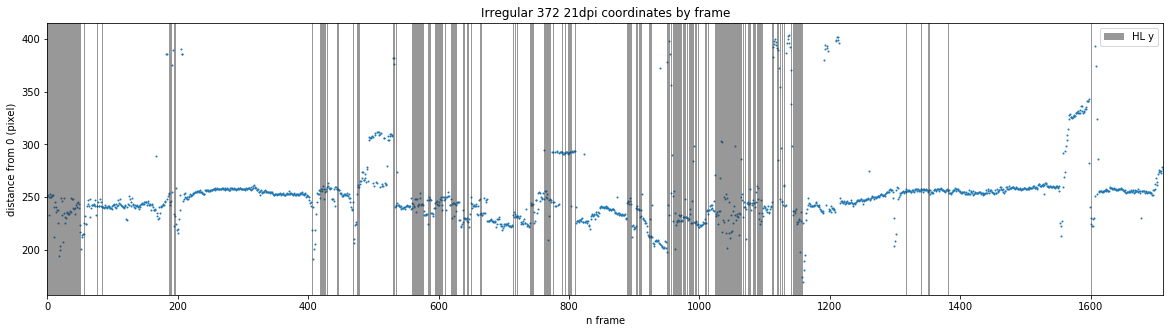

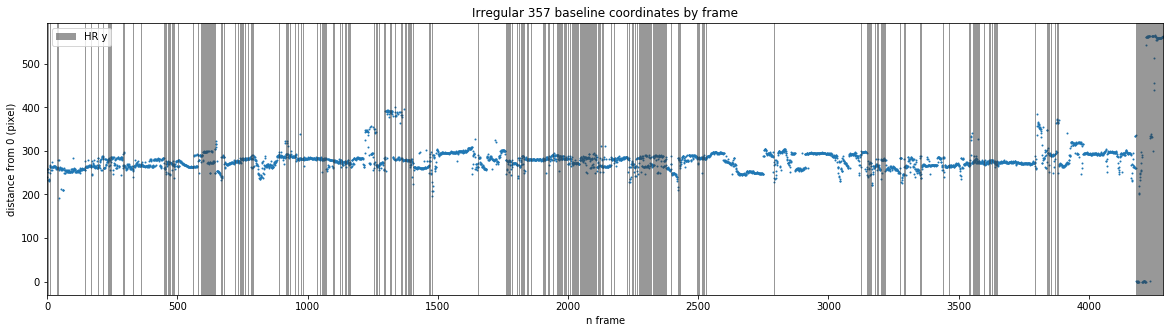

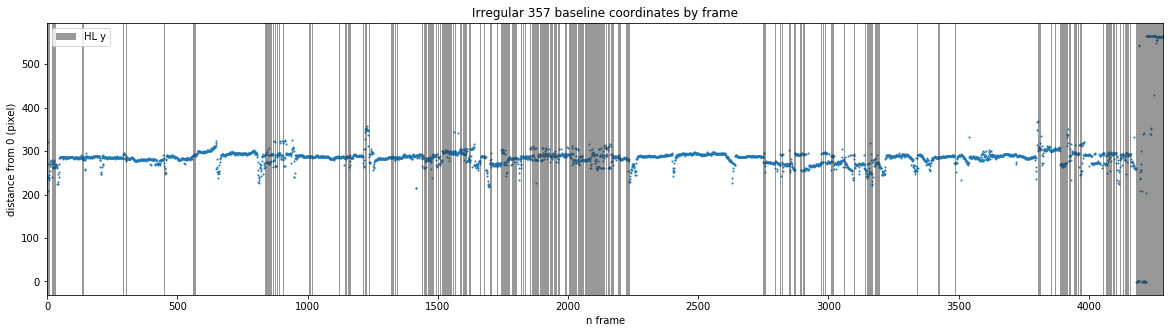

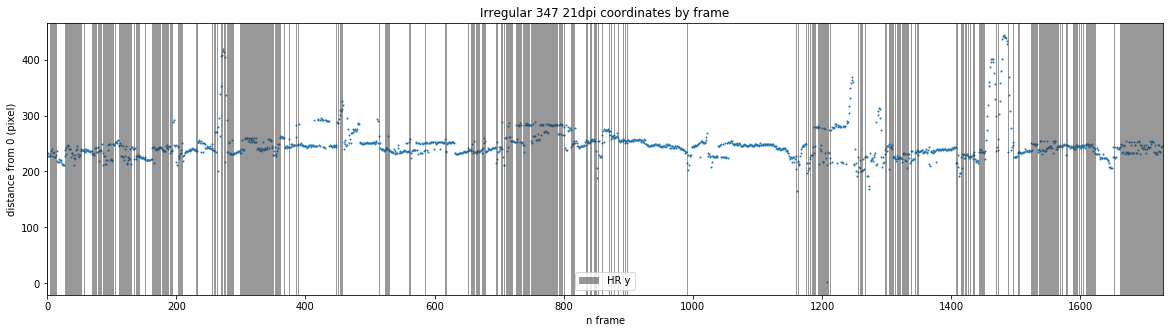

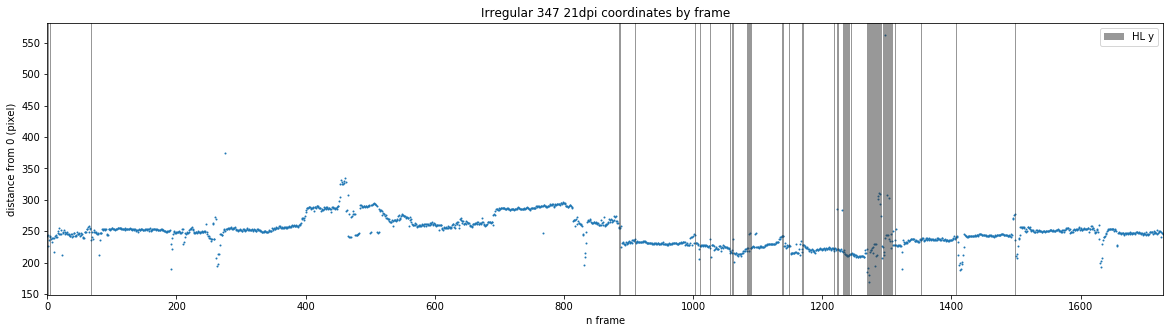

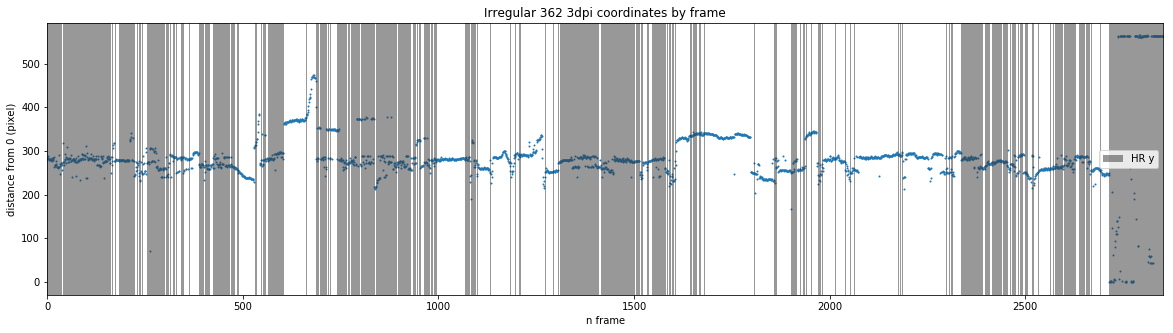

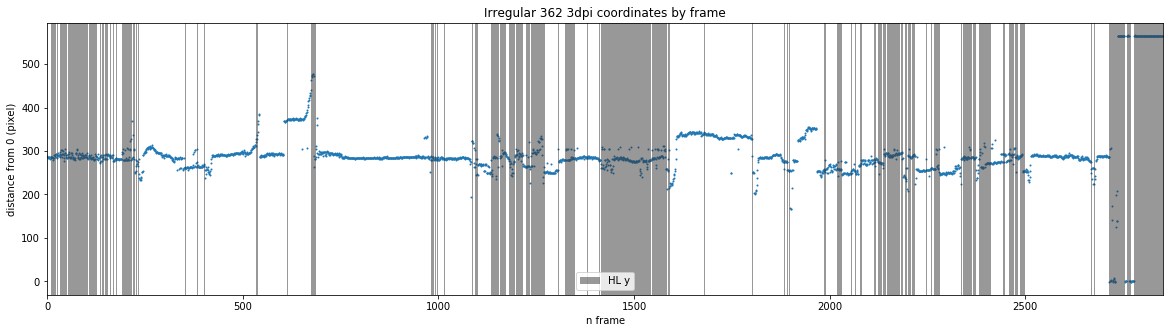

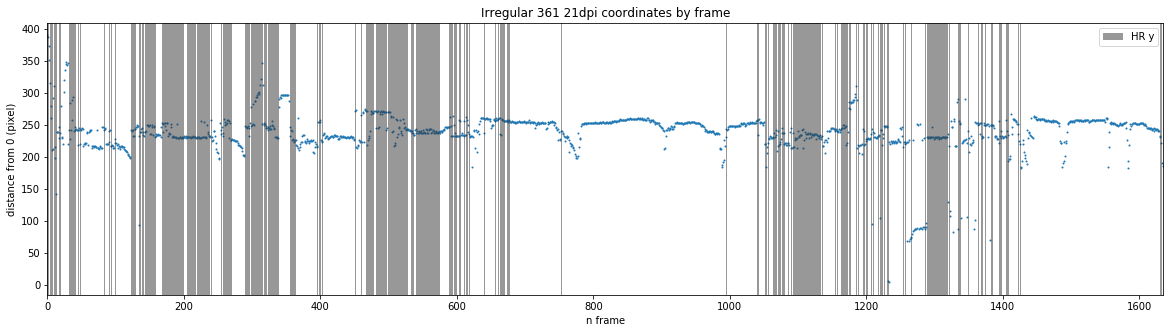

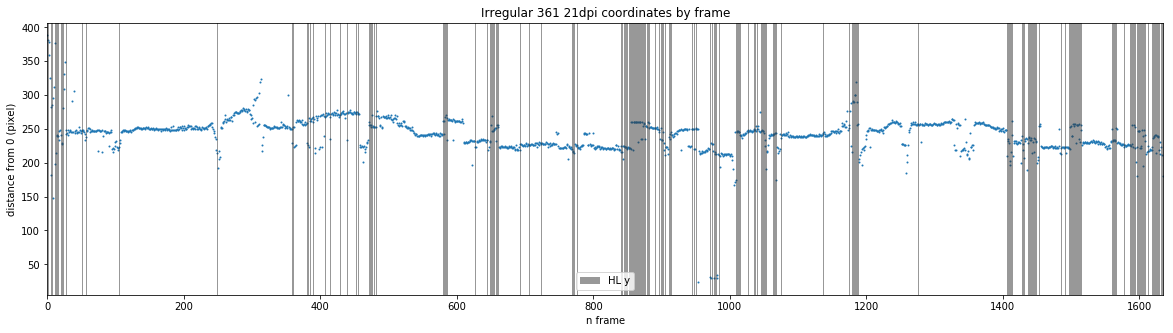

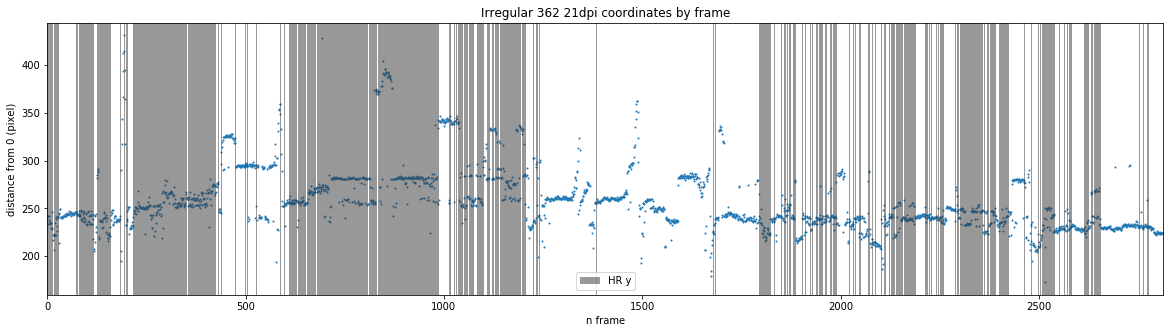

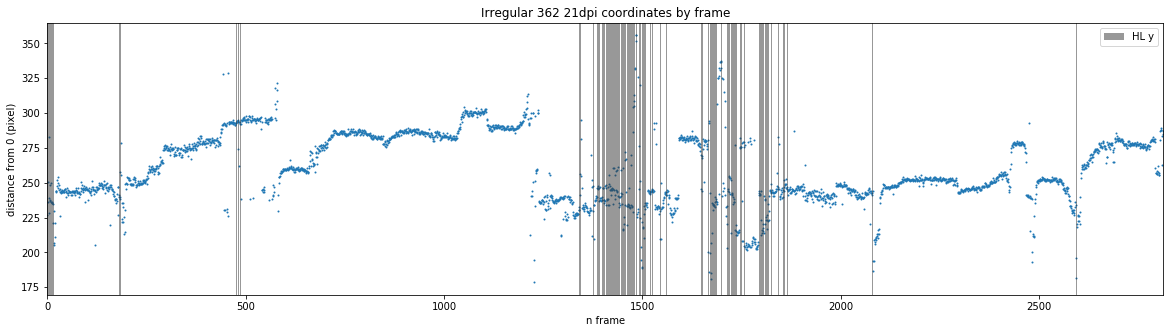

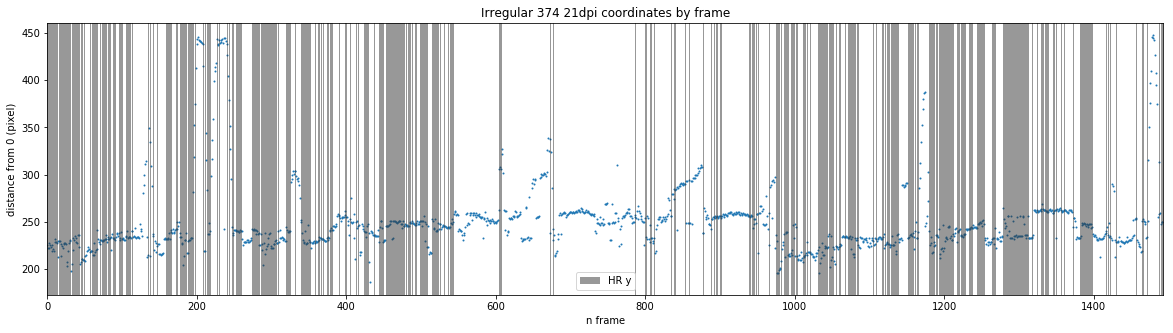

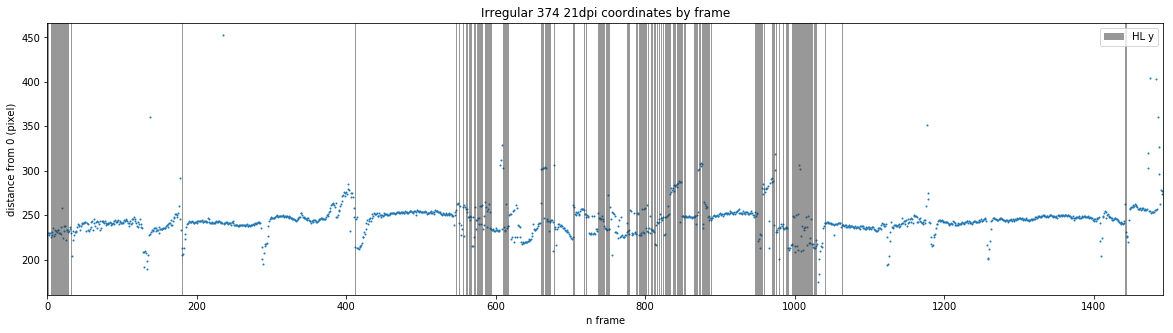

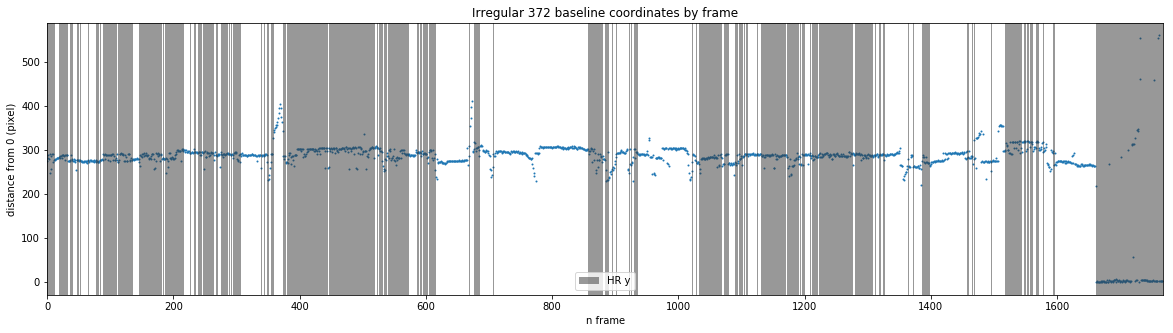

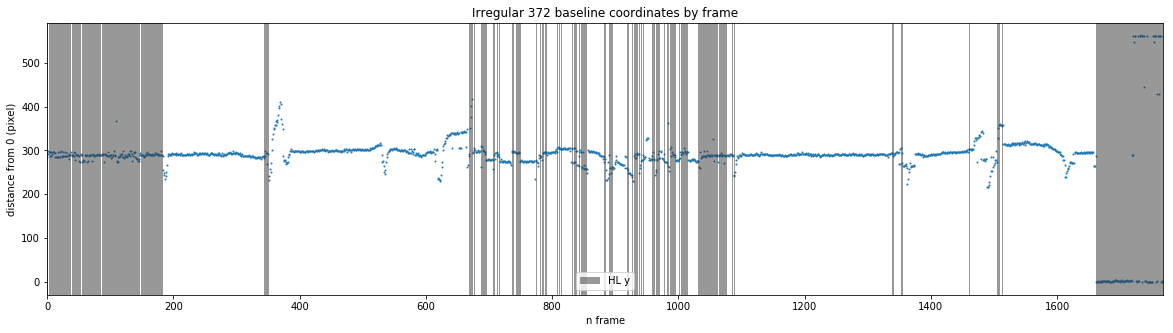

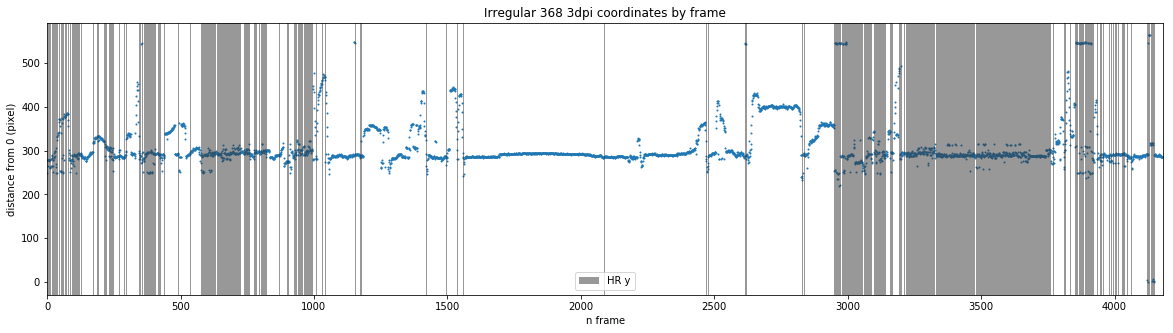

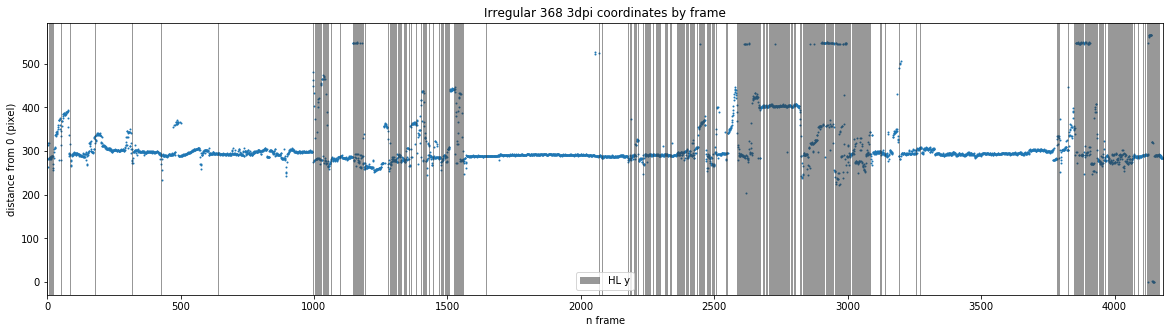

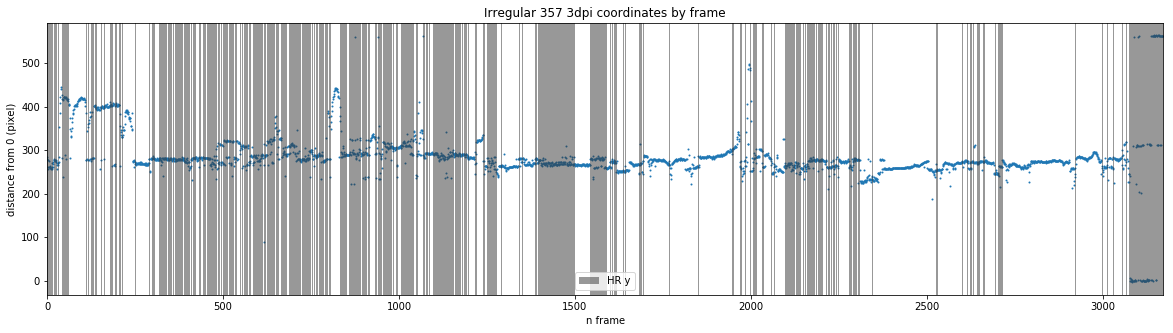

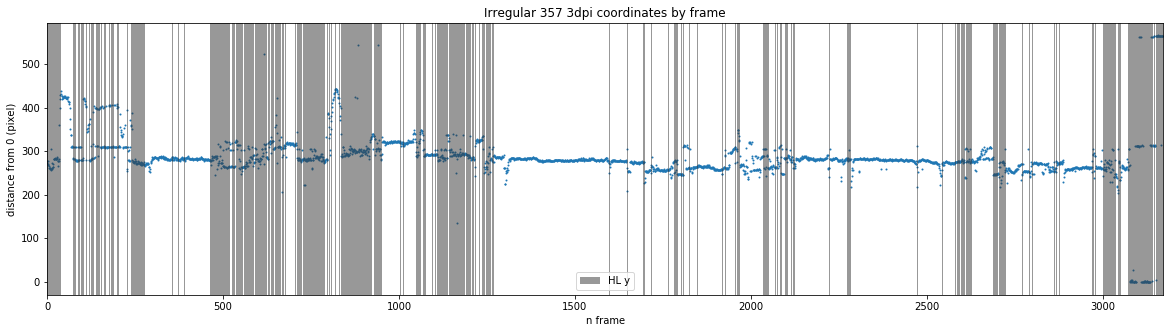

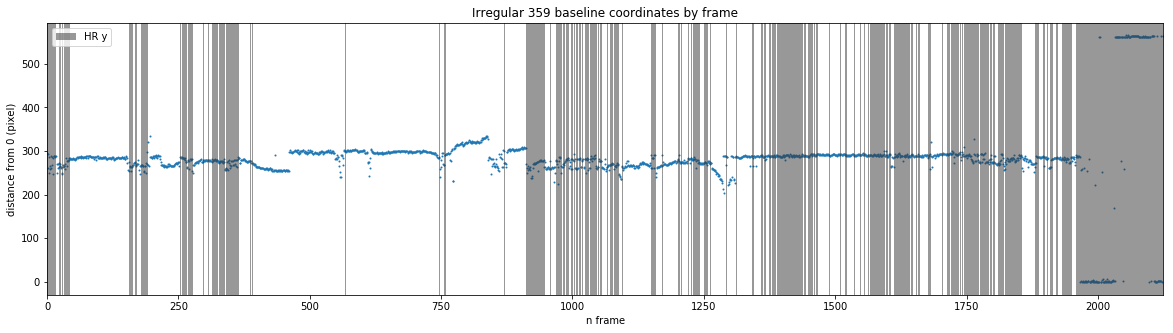

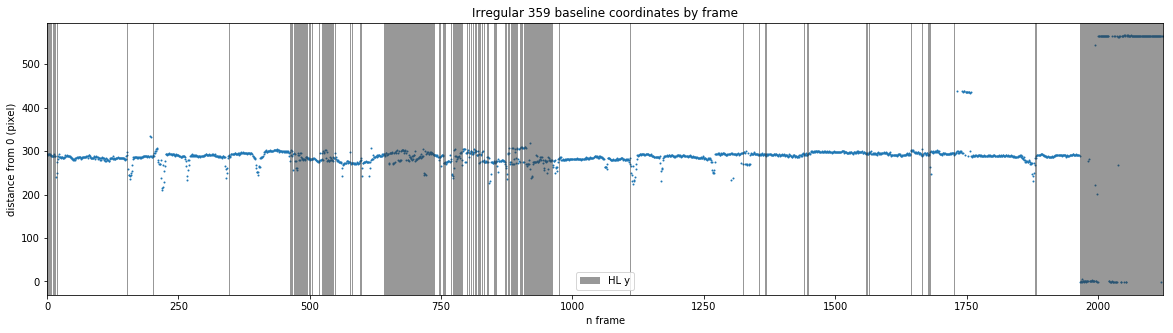

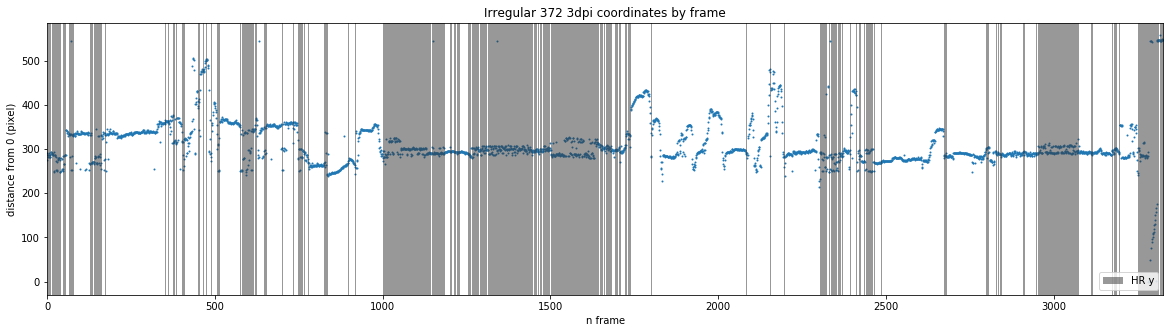

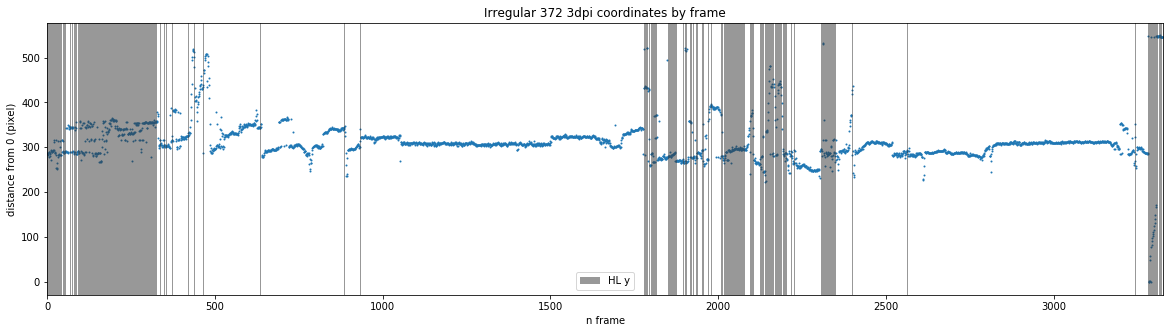

In [7]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.3)

    plt.xlim((start, end))

    plot_data(df, 'HL', start, end, filename, 'y', 0.3)

    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.5)

    plt.xlim((start, end))

    plot_data(df, 'HL', start, end, filename, 'y', 0.5)

    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.7)

    plt.xlim((start, end))

    plot_data(df, 'HL', start, end, filename, 'y', 0.7)

    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.9)

    plt.xlim((start, end))

    plot_data(df, 'HL', start, end, filename, 'y', 0.9)

    plt.xlim((start, end))

In [15]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
    '''
    There are two parameters: 
    p for asymmetry and λ for smoothness. 
    Both have to be tuned to the data at hand. 
    We found that generally 0.001 ≤ p ≤ 0.1 is a good choice 
    (for a signal with positive peaks) 
    and 10^2 ≤ λ ≤ 10^9 , 
    but exceptions may occur. 
    In any case one should vary λ on a grid that is approximately linear for log λ
    '''
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

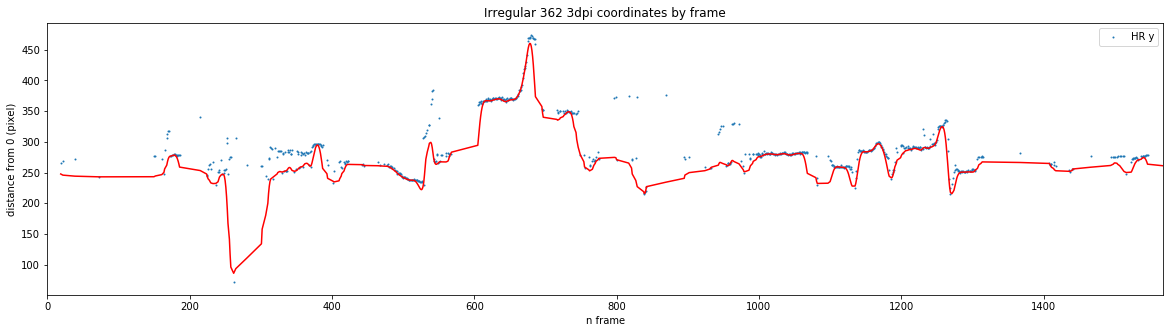

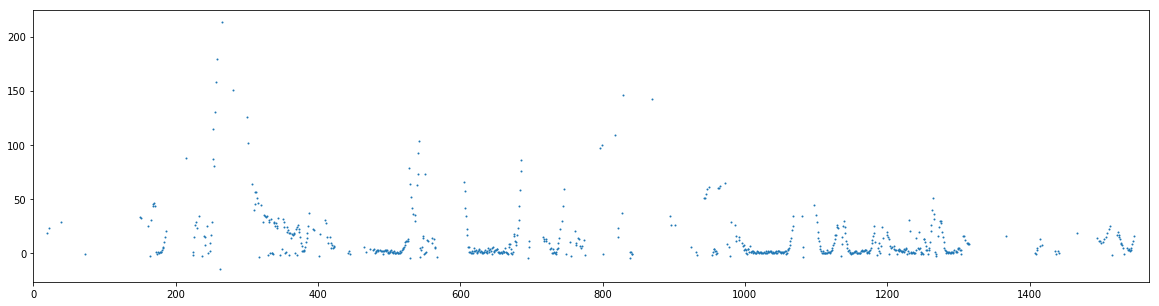

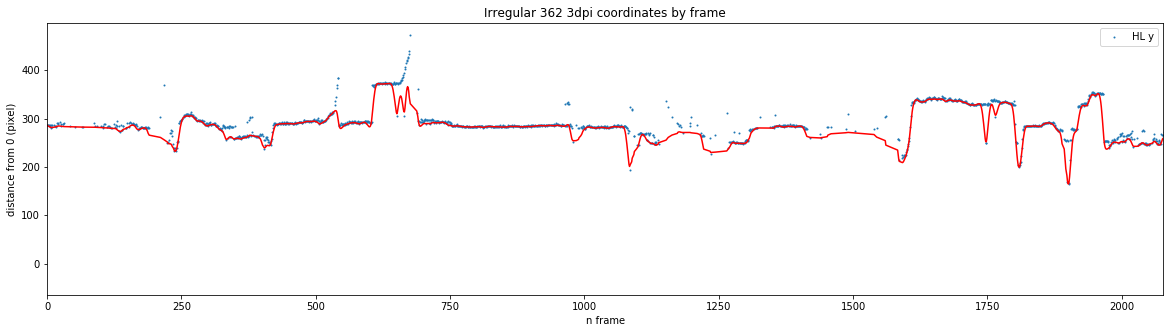

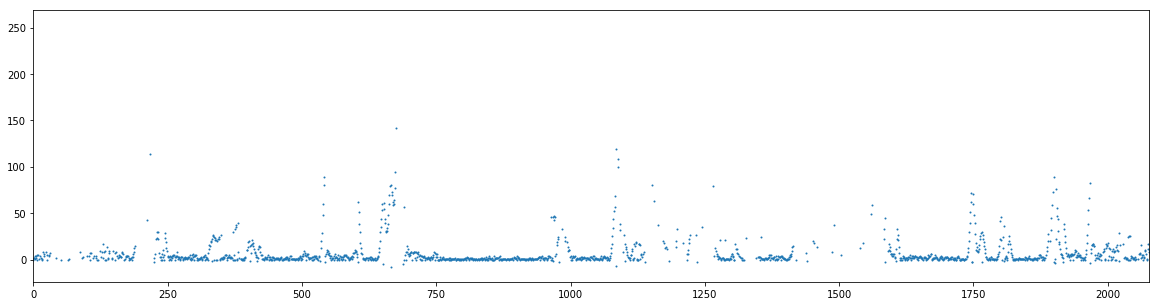

In [376]:
file = file_list[20]

df, filename = read_file(file)
df = fix_column_names(df)
df = filter_predictions(df, 'HR', 0.1)

start = 0
end = len(df)

bodypart = 'HR'

plot_data(df, bodypart, start, end, filename, 'y', 1)
plt.xlim(start, end)

baseline = baseline_als(df['%s %s' %(bodypart, 'y')][start:end], 1, 0.01)
plt.plot(df['bodyparts coords'][start:end], baseline, 'r')

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, 'y')][start:end]-baseline, s=1)
plt.xlim(start, end)
df['%s y' %bodypart] = df['%s y' %bodypart][start:end]-baseline

n, depth, slips, properties = find_slips(df, 'HL')
# plot_slips(df, bodypart, slips)

df, filename = read_file(file)
df = fix_column_names(df)
df = filter_predictions(df, 'HL', 0.1)

start = 0
end = len(df)

bodypart = 'HL'

plot_data(df, bodypart, start, end, filename, 'y', 1)
plt.xlim(start, end)

baseline = baseline_als(df['%s %s' %(bodypart, 'y')][start:end], 1, 0.01)
plt.plot(df['bodyparts coords'][start:end], baseline, 'r')

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, 'y')][start:end]-baseline, s=1)
plt.xlim(start, end)
df['%s y' %bodypart] = df['%s y' %bodypart][start:end]-baseline

In [328]:
def jump_correction(pd_dataframe, bodypart, axis, epsilon):
    mean = np.mean(pd_dataframe['%s %s'%(bodypart, axis)])
    for i in range(1, len(pd_dataframe['bodyparts coords'].iloc[:])):
        
        loc = df['bodyparts coords'].iloc[i]
        
        if abs(pd_dataframe['%s %s'%(bodypart, axis)][loc] - mean) > epsilon:
            pd_dataframe['%s %s'%(bodypart, axis)][loc] = pd_dataframe['%s %s'%(bodypart, axis)][df['bodyparts coords'].iloc[i-1]]
        if pd_dataframe['%s %s'%(bodypart, axis)][loc] < 100:
            pd_dataframe['%s %s'%(bodypart, axis)][loc] = mean
            
    return pd_dataframe['%s %s'%(bodypart, axis)]


def find_slips_pos(pd_dataframe, bodypart, **kwargs): 
        
    peaks, properties = find_peaks(-pd_dataframe['%s y'%bodypart], width=5, height=-100000, prominence = 1)
    # peaks, properties = find_peaks(pd_dataframe, prominence=0, distance=18, height=-10, width = 0)
    # width_half = peak_widths(data, peaks, rel_height=0.5)
    
#         peaks, properties = find_peaks(-data, prominence=(10,100000), height=-5000, width = 0)
#         width_half = peak_widths(-data, peaks, rel_height=0.5)
    
    index = pd_dataframe['bodyparts coords'].iloc[:]
    
    is_peak = np.zeros(len(index))
    n_peaks = 0
    current_data = pd_dataframe.iloc[0]
    norm = np.max(pd_dataframe['%s y'%bodypart])
    std = np.std(pd_dataframe['%s y'%bodypart])
    
    for i in range(len(is_peak)):
        
        if i in peaks:
            # is_peak[i] = df['toe y'][i]
            is_peak[i] = norm-std*4
            n_peaks += 1
        
        else:
            is_peak[i] = norm-std*2
            
        current_data = pd_dataframe.iloc[i]
        
        h_peaks = np.mean(properties["prominences"])
        
    return n_peaks, h_peaks, peaks, properties

In [243]:
from scipy.ndimage.filters import median_filter

240.130029296875

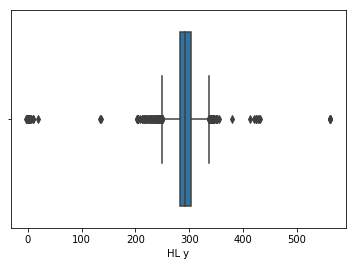

In [242]:
import seaborn as sns
sns.boxplot(x=df['HL y'])
df['HL y'].quantile(0.03)

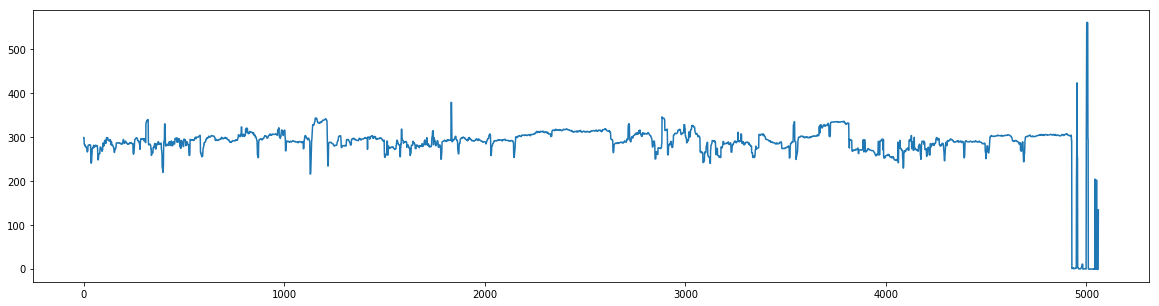

In [252]:
median_filter(df['HL y'], size=2000)
plt.figure(figsize=(20,5))
plt.plot(median_filter(df['HL y'], size=5))

Irregular 359 3dpi
31.87855036118452 pixels
23.87219385924651 pixels


Text(0.5, 1.0, 'baseline and jump corrected (baseline calculated on jump corrected data)')

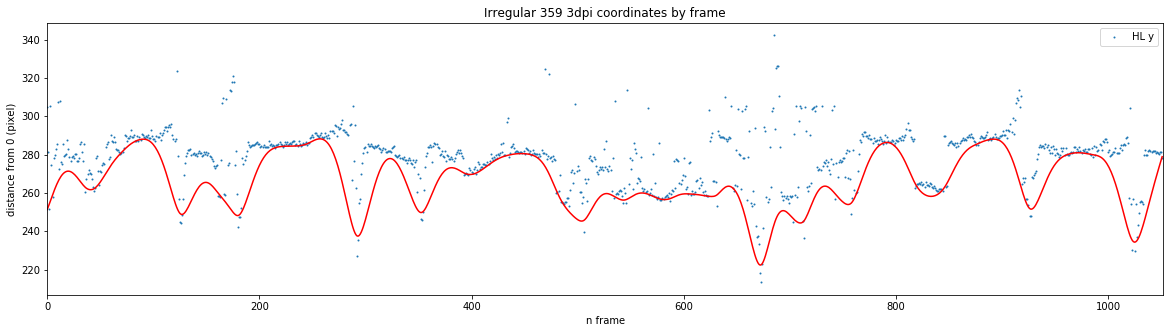

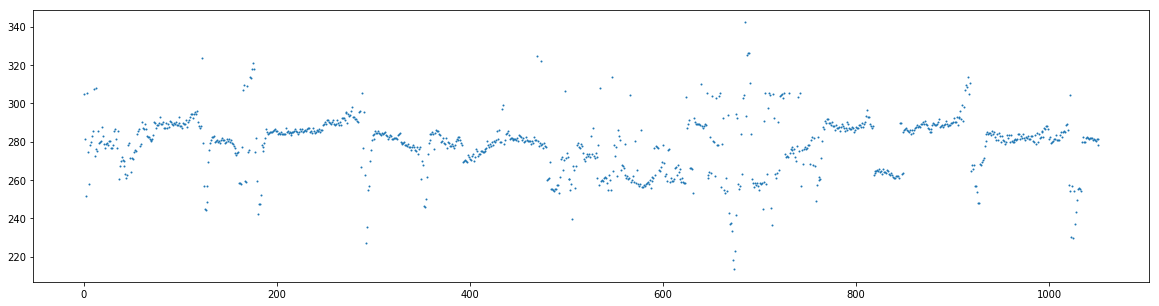

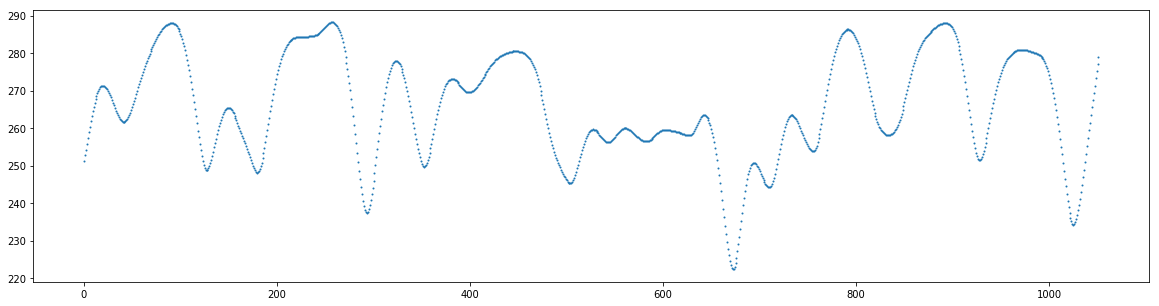

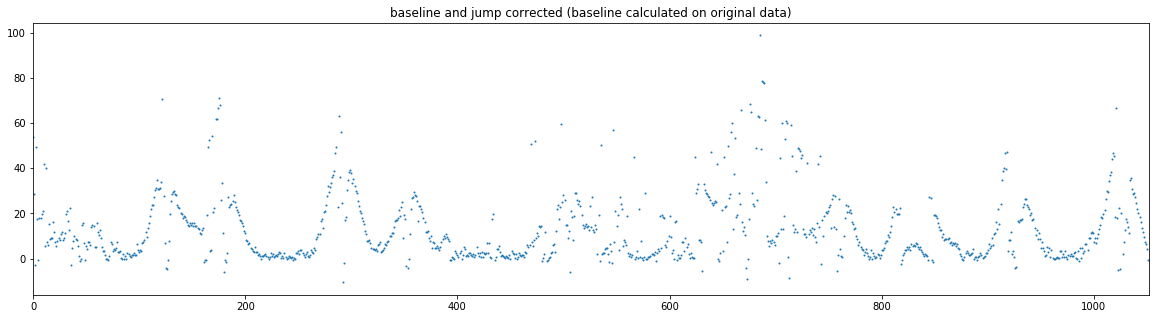

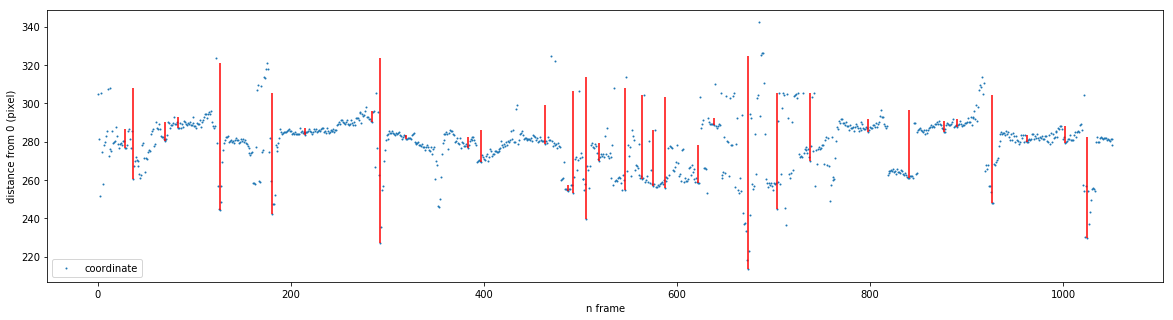

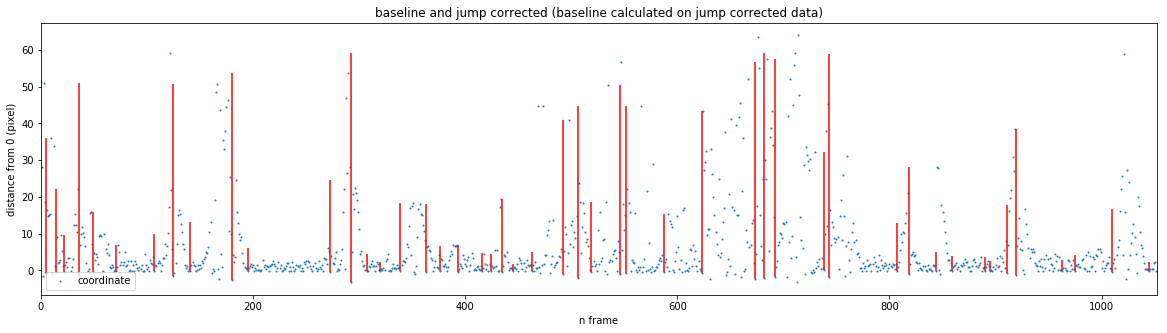

In [345]:
file = file_list[10]

df, filename = read_file(file)
print(filename)
df = fix_column_names(df)

start = 0
end = len(df)

bodypart = 'HL'

plot_data(df, bodypart, start, end, filename, 'y', 1)
plt.xlim(start, end)
# low = df['HL y'].quantile(0.01)
# high = df['HL y'].quantile(0.99)
# df = df.loc[(df['HL y'] >= low) & (df['HL y'] <= high)]

# plt.plot(df['HL y'], 'r')

jump_corrected = jump_correction(df, bodypart, 'y', 10*np.std(df['%s %s' %(bodypart, 'y')][start:end]))
baseline = baseline_als(df['%s %s' %(bodypart, 'y')][start:end], 10**2, 0.01)
plt.plot(baseline, 'r')
plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], jump_corrected, s=1)

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], baseline, s=1)

# plt.figure(figsize=(20,5))
# plt.scatter(df['bodyparts coords'][start:end], baseline, s=1)

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, 'y')][start:end]-baseline, s=1)
plt.title('baseline and jump corrected (baseline calculated on original data)')
plt.xlim(start, end)
df['%s y' %bodypart] = jump_corrected
plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], jump_corrected, s=1)
n, depth, slips, properties = find_slips_pos(df, bodypart)
plot_slips(df, bodypart, slips)


# df['%s y' %bodypart] = jump_corrected
baseline = baseline_als(df['%s %s' %(bodypart, 'y')][start:end], 1, 0.01)

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], jump_corrected-baseline, s=1)
df['%s y' %bodypart] = jump_corrected-baseline
n, depth, slips, properties = find_slips_pos(df, bodypart)
plot_slips(df, bodypart, slips)
plt.xlim(start,end)
plt.title('baseline and jump corrected (baseline calculated on jump corrected data)')


# plt.figure(figsize=(20,5))
# plt.scatter(df['bodyparts coords'][start:end], jump_corrected-baseline, s=1)

Irregular 359 3dpi
27.910077875310733 pixels
20.832551092033384 pixels


Text(0.5, 1.0, 'baseline and jump corrected (baseline calculated on jump corrected data)')

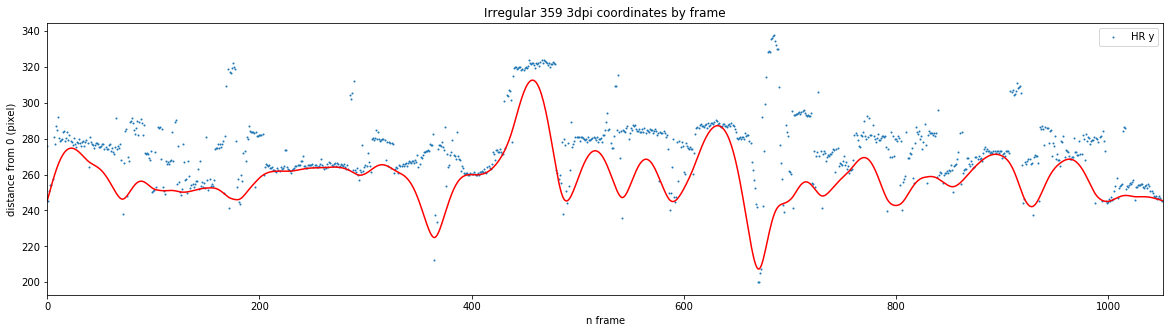

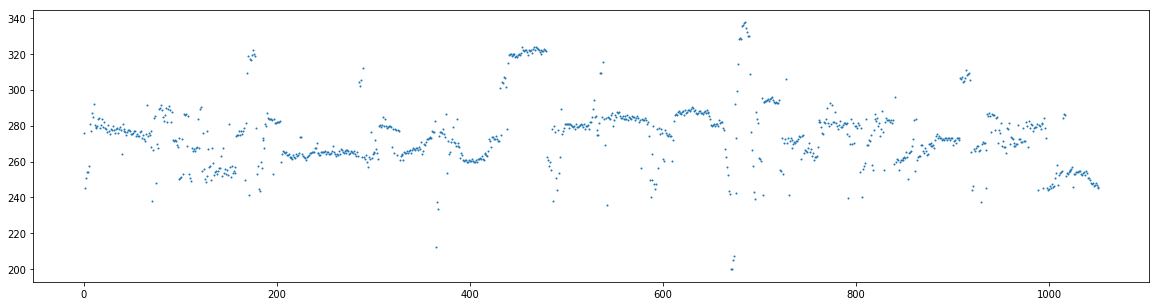

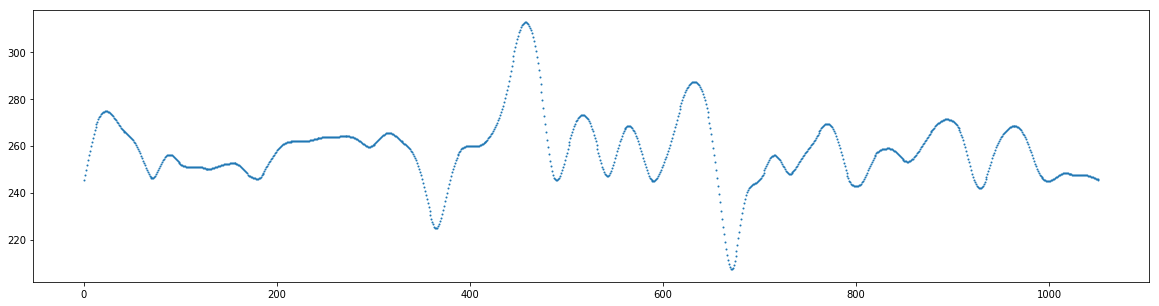

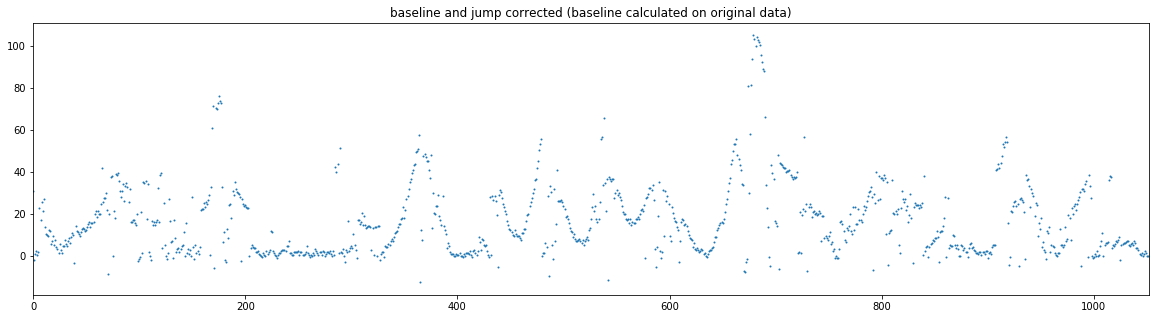

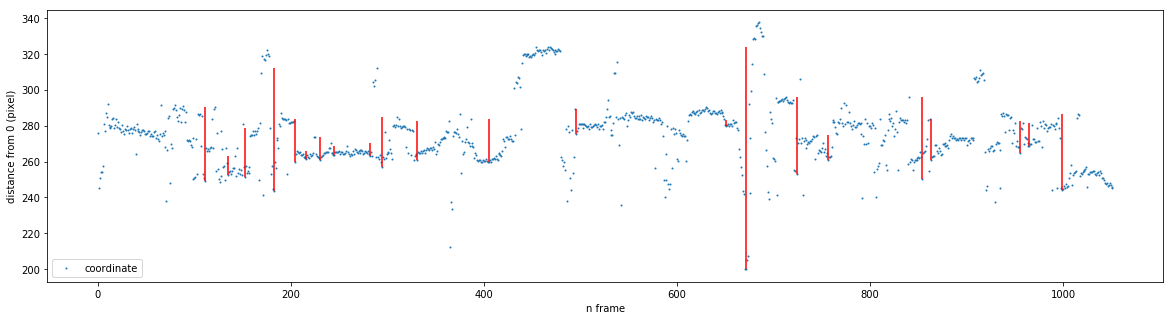

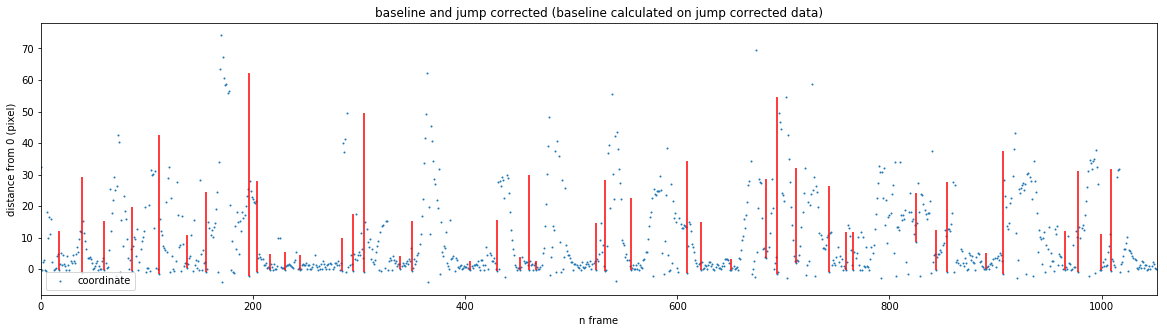

In [346]:
file = file_list[10]

df, filename = read_file(file)
print(filename)
df = fix_column_names(df)

start = 0
end = len(df)

bodypart = 'HR'

plot_data(df, bodypart, start, end, filename, 'y', 1)
plt.xlim(start, end)
# low = df['HL y'].quantile(0.01)
# high = df['HL y'].quantile(0.99)
# df = df.loc[(df['HL y'] >= low) & (df['HL y'] <= high)]

# plt.plot(df['HL y'], 'r')

jump_corrected = jump_correction(df, bodypart, 'y', 10*np.std(df['%s %s' %(bodypart, 'y')][start:end]))
baseline = baseline_als(df['%s %s' %(bodypart, 'y')][start:end], 10**2, 0.01)
plt.plot(baseline, 'r')
plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], jump_corrected, s=1)

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], baseline, s=1)

# plt.figure(figsize=(20,5))
# plt.scatter(df['bodyparts coords'][start:end], baseline, s=1)

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, 'y')][start:end]-baseline, s=1)
plt.title('baseline and jump corrected (baseline calculated on original data)')
plt.xlim(start, end)
df['%s y' %bodypart] = jump_corrected
plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], jump_corrected, s=1)
n, depth, slips, properties = find_slips_pos(df, bodypart)
plot_slips(df, bodypart, slips)


# df['%s y' %bodypart] = jump_corrected
baseline = baseline_als(df['%s %s' %(bodypart, 'y')][start:end], 1, 0.01)

plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], jump_corrected-baseline, s=1)
df['%s y' %bodypart] = jump_corrected-baseline
n, depth, slips, properties = find_slips_pos(df, bodypart)
plot_slips(df, bodypart, slips)
plt.xlim(start,end)
plt.title('baseline and jump corrected (baseline calculated on jump corrected data)')


# plt.figure(figsize=(20,5))
# plt.scatter(df['bodyparts coords'][start:end], jump_corrected-baseline, s=1)

In [323]:
df['bodyparts coords'].iloc[2369]

2372

In [271]:
list((df['HL y'] >= df['HL y'].quantile(0.02)).bool() and (df['HL y'] <= df['HL y'].quantile(0.95)).bool())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [256]:
all?

51.01966917820466 pixels


Text(0.5, 1.0, 'baseline and jump corrected (baseline calculated on jump corrected data)')

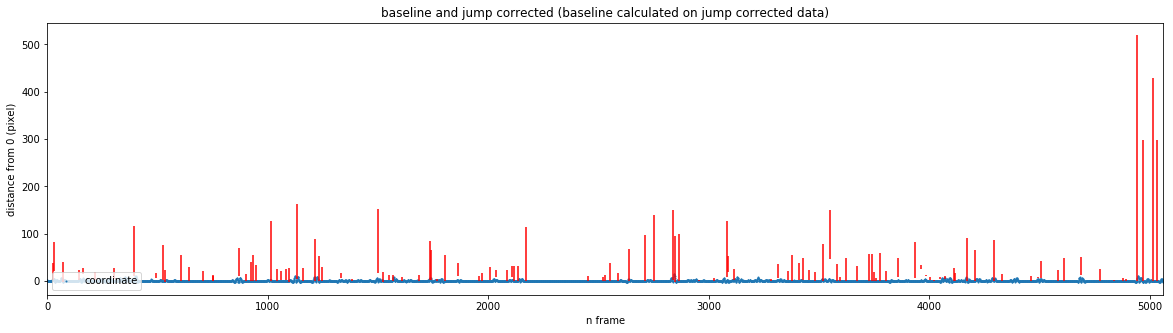

In [220]:
plt.figure(figsize=(20,5))
plt.scatter(df['bodyparts coords'][start:end], baseline, s=1)
n, depth, slips, properties = find_slips_pos(df, 'HR')
plot_slips(df, bodypart, slips)
plt.xlim(start,end)
plt.title('baseline and jump corrected (baseline calculated on jump corrected data)')

## Find y-coordinate peaks with scipy

In [105]:
find_slips(df, 'HL')

(93,
 36.10169146137853,
 array([   6,    8,   12,   62,  140,  194,  272,  282,  290,  298,  329,
         345,  350,  353,  406,  414,  421,  441,  449,  471,  579,  629,
         774,  779,  790,  794,  798,  806,  813,  820,  826,  829,  848,
         865,  878,  881,  898,  902,  906,  913,  922,  942,  947,  953,
         957,  973, 1037, 1041, 1047, 1061, 1074, 1109, 1114, 1151, 1171,
        1177, 1183, 1188, 1194, 1205, 1218, 1225, 1230, 1243, 1252, 1259,
        1266, 1272, 1286, 1300, 1312, 1314, 1321, 1341, 1357, 1368, 1385,
        1403, 1406, 1408, 1413, 1418, 1420, 1426, 1433, 1437, 1441, 1462,
        1511, 1518, 1595, 1647, 1787]),
 {'prominences': array([ 23.90643311,  16.23937988,  23.90625   ,  11.89149475,
          10.86590576,  23.33961487,  12.91546631,  55.18537903,
          19.98457336,  14.08047485,  11.87284851,  49.29470825,
          28.02116394,  16.17463684,  27.52735901,  45.13691711,
          75.67738342,  35.19696045,  38.61395264,  11.10139465,
   

In [106]:
findPeaks(df['bodyparts coords'].iloc[:], df['HR y'].iloc[:], 1)

TypeError: findPeaks() takes 2 positional arguments but 3 were given